# Задание для итоговой работы

**Анализ данных о покупках** 

* Шаг 1. Импорт библиотек 
* Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)
* Шаг 3. Очистка данных
    1. Проверить соответствие типов данных, выполнить преобразование типов данных при необходимости
    1. Проверить на пропуски, заполнить пропуски при необходимости 
    1. Проверить данные на наличие дубликатов в датасетах *customers* и *product*
    1. Выполнить поиск аномалий в данных, построить диаграмму размаха по признаку возраст покупателя, выполнить удаление выбросов при необходимости
* Шаг 4. Разведочный (исследовательский) анализ данных
    1. Определить сколько товаров продавалось в разные месяцы, построить график плотности
    1. Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
    1. Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
    1. Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
    1. Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
    1. Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму
* Шаг 5. Анализ взаимосвязи признаков
    1. Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
* Шаг 6. Кластеризация по покупателем
    1. Сформировать датасет с признаками *покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей*
    1. Найти оптимальное количество кластеров по покупателям
    1. Построить модель кластеризации данных
    1. Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы
* Шаг 7. Построение рекомендательной системы 
    1. Сформировать датасет с признаками *покупатель, товар, количество купленных товаров*
    1. Выполнить коллаборативную фильтрацию по схожести покупателей
    1. Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510
    

Исходные файлы для анализа:

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true

https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true



# Описание датасета
#### customers.csv

Признак | Описание
--:|:--
club_member | Статус члена клуба магазина
fashion_news | Часто ли смотрит новости о моде
age | Возраст
customer_id | Уникальный идентификатор покупателя


#### transactions.csv
Признак | Описание
--:|:--
t_dat | Дата
article_id | Уникальный идентификатор товара
price | Цена товара
customer_id | Уникальный идентификатор покупателя


#### product.csv
Признак | Описание
--:|:--
article_id | Уникальный идентификатор товара
product_name | Наименование товара
colour | Цвет товара

# Шаг 1. Импорт библиотек

In [1]:
#Шаг 1. Импорт библиотек
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import scipy.sparse as sparse
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

rcParams["figure.figsize"] = 10, 6
sns.set_style("whitegrid", {'axes.grid' : True})

# Шаг 2. Загрузка данных из файлов (customers.csv, transactions.csv, product.csv)

In [2]:
#Шаг 2. Загрузка данных из файлов (transactions.csv, customers.csv,  product.csv)
df_rating = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/transactions.csv?raw=true", index_col=0)

df_user = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/customers.csv?raw=true", index_col=0)

df_item = pd.read_csv("https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/stat/product.csv?raw=true", index_col=0)

# Шаг 3. Очистка данных

## Шаг 3. Очистка данных. файл transactions.csv-df.rating: получение необходимой информации и обработка датасета 

In [3]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317884 entries, 0 to 317883
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   t_dat        317884 non-null  object 
 1   article_id   317884 non-null  int64  
 2   price        317884 non-null  float64
 3   customer_id  317884 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.1+ MB


In [4]:
df_rating.shape

(317884, 4)

Из предыдущих двух запросов следует, что датасет имеет размерность 317884,4 .Пустые значения отсутствуют.
можно произвести дополнительную проверку запросом df_rating.isnull().sum(). Однако, очевидно, что пустые значения не будут найдены. Поэтому не будем выполнять  эту команду.

In [5]:
# Преодразование формата столбца t_dat 
df_rating["t_dat"] = pd.to_datetime(df_rating["t_dat"])

In [6]:
# Получение уникальных значений по каждому столбцу
df_rating.describe()

print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df_rating.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df_rating[i].unique()))+'\033[0m')
    print(df_rating[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак t_dat имеет 734 следующих уникальных значений:
['2020-04-13T00:00:00.000000000' '2018-09-21T00:00:00.000000000'
 '2018-10-04T00:00:00.000000000' '2018-12-11T00:00:00.000000000'
 '2019-04-08T00:00:00.000000000' '2019-03-31T00:00:00.000000000'
 '2019-01-28T00:00:00.000000000' '2019-10-06T00:00:00.000000000'
 '2020-07-04T00:00:00.000000000' '2020-03-31T00:00:00.000000000'
 '2018-10-23T00:00:00.000000000' '2019-02-26T00:00:00.000000000'
 '2020-09-03T00:00:00.000000000' '2018-10-29T00:00:00.000000000'
 '2020-07-11T00:00:00.000000000' '2020-09-17T00:00:00.000000000'
 '2019-06-19T00:00:00.000000000' '2019-07-09T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-02-27T00:00:00.000000000'
 '2018-10-07T00:00:00.000000000' '2019-01-06T00:00:00.000000000'
 '2020-03-02T00:00:00.000000000' '2020-01-02T00:00:00.000000000'
 '2020-08-23T00:00:00.000000000' '2018-11-13T00:00:00.000000000'
 '2020-05-19T00:00:00.000000000' '2020-07-17T00:00:00.000000000'
 '2019-08-30T0

## Шаг 3. Очистка данных. файл customers.csv-df.user: получение необходимой информации и обработка датасета 

In [7]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229804 entries, 0 to 229803
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   club_member   229343 non-null  object 
 1   fashion_news  228565 non-null  object 
 2   age           228613 non-null  float64
 3   customer_id   229804 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ MB


In [8]:
df_user.shape

(229804, 4)

В трех столбцах имеются пустые ячейки. Выыводим их сумму

In [9]:

df_user.isnull().sum()

club_member      461
fashion_news    1239
age             1191
customer_id        0
dtype: int64

Выполняем заполнение пустых значений по наиболее часто встречающимся данным

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_user["club_member"] = imputer.fit_transform(df_user["club_member"].values.reshape(-1,1))[:,0]

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_user["fashion_news"] = imputer.fit_transform(df_user["fashion_news"].values.reshape(-1,1))[:,0]

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_user["age" ] = imputer.fit_transform(df_user["age"].values.reshape(-1,1))[:,0]

Повторная проверка на наличие пустых ячеек, а также дубликатов

In [13]:
df_user.isnull().sum()

club_member     0
fashion_news    0
age             0
customer_id     0
dtype: int64

In [14]:
df_user.duplicated().sum()

0

In [15]:
df_user.describe()

print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df_user.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df_user[i].unique()))+'\033[0m')
    print(df_user[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак club_member имеет 3 следующих уникальных значений:
['ACTIVE' 'PRE-CREATE' 'LEFT CLUB']
---------------------------------------------------------------------------------
Признак fashion_news имеет 3 следующих уникальных значений:
['NONE' 'Regularly' 'Monthly']
---------------------------------------------------------------------------------
Признак age имеет 79 следующих уникальных значений:
[49. 32. 56. 30. 40. 44. 26. 24. 52. 48. 19. 51. 25. 20. 43. 41. 60. 45.
 28. 27. 71. 22. 36. 23. 34. 39. 50. 33. 29. 55. 42. 47. 53. 54. 46. 59.
 21. 61. 58. 62. 35. 68. 64. 63. 38. 57. 31. 65. 37. 66. 18. 72. 76. 70.
 75. 73. 67. 69. 74. 17. 78. 82. 79. 77. 85. 84. 88. 83. 80. 93. 81. 16.
 91. 89. 90. 98. 95. 87. 96.]
---------------------------------------------------------------------------------
Признак customer_id имеет 229804 следующих уникальных значений:
[ 91991 164401 182738 ...  76150  94386 210647]
-------------------------------------------------------------

<AxesSubplot:>

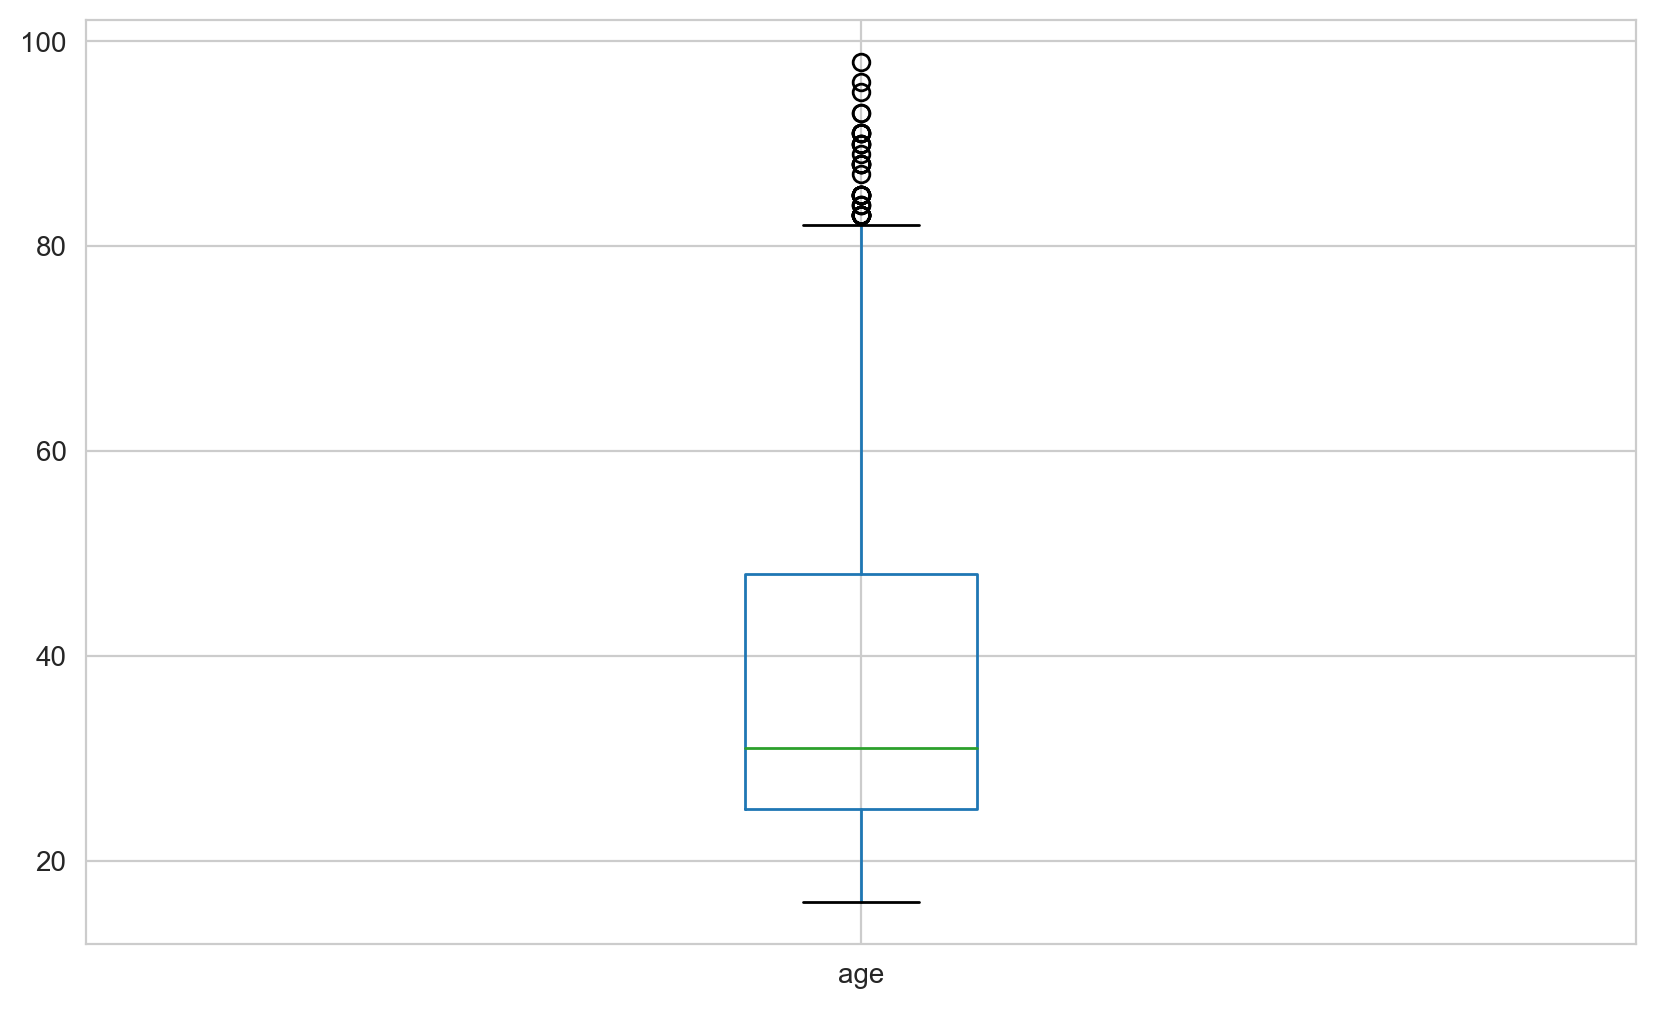

In [16]:
# Построение  диаграммы размаха по признаку возраст покупателя
df_user.boxplot(column=['age'])

In [17]:
# Удаление выбросов
df_user = df_user[df_user['age']<80]

<AxesSubplot:>

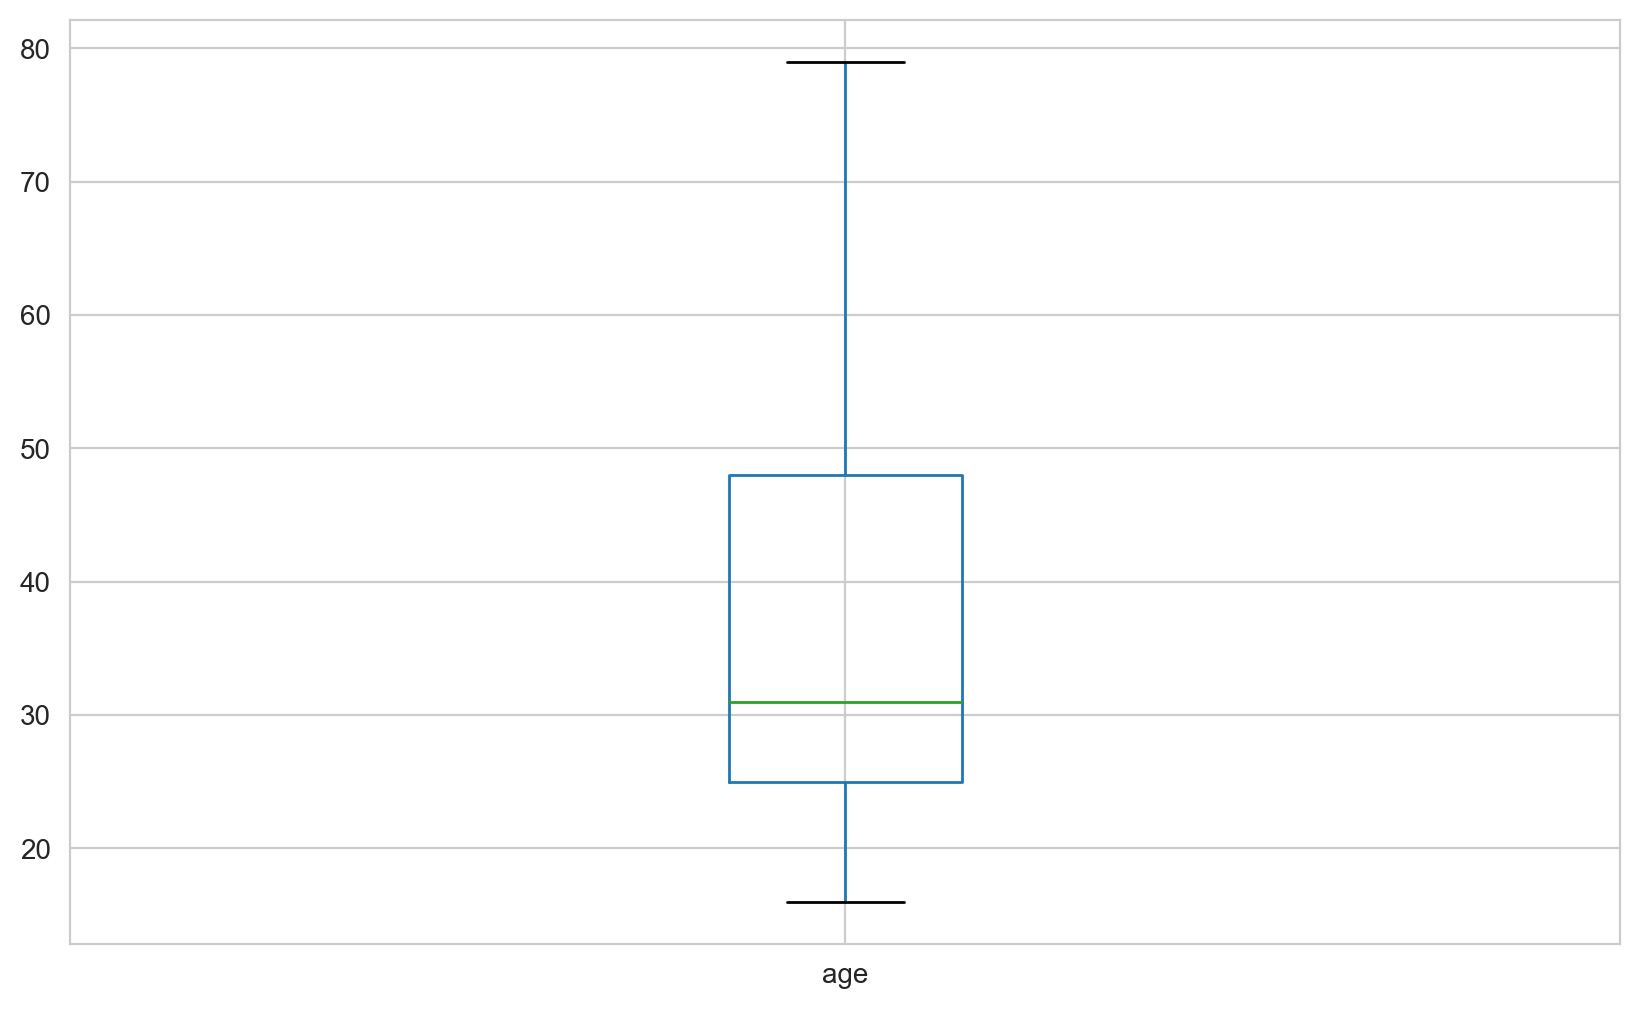

In [18]:
# Удаление выбросов. Визуальная проверка

df_user.boxplot(column=['age'])

In [19]:
# Удаление выбросов.  проверка размерностью
df_user.shape

(229682, 4)

## Шаг 3. Очистка данных. файл product.csv-df.item: получение необходимой информации и обработка датасета 

In [20]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53626 entries, 0 to 53625
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    53626 non-null  int64 
 1   product_name  53626 non-null  object
 2   color         53626 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [21]:
df_item.shape

(53626, 3)

 Из предыдущих двух запросов следует, что датасет имеет размерность 53626,3 .Пустые значения отсутствуют.
можно произвести дополнительную проверку запросом df_item.isnull().sum(). Очевидно, что пустые значения не будут найдены.

In [22]:
df_item.duplicated().sum()

0

In [23]:
df_item.describe()

print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df_item.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df_item[i].unique()))+'\033[0m')
    print(df_item[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак article_id имеет 53626 следующих уникальных значений:
[108775015 108775044 110065001 ... 949551002 952267001 953450001]
---------------------------------------------------------------------------------
Признак product_name имеет 118 следующих уникальных значений:
['Vest top' 'Bra' 'Underwear Tights' 'Leggings/Tights' 'Trousers'
 'Hair clip' 'Umbrella' 'Sweater' 'Bodysuit' 'Hair string' 'Socks'
 'Unknown' 'Top' 'Pyjama jumpsuit/playsuit' 'Hoodie' 'Hair/alice band'
 'Belt' 'Bikini top' 'Underwear bottom' 'Swimsuit' 'Skirt' 'Hat/beanie'
 'Kids Underwear top' 'Shorts' 'T-shirt' 'Cap/peaked' 'Pyjama set'
 'Sneakers' 'Dress' 'Sunglasses' 'Cardigan' 'Gloves' 'Earring' 'Blazer'
 'Swimwear bottom' 'Jacket' 'Shirt' 'Costumes' 'Robe' 'Scarf' 'Coat'
 'Other accessories' 'Polo shirt' 'Slippers' 'Night gown' 'Alice band'
 'Straw hat' 'Tailored Waistcoat' 'Ballerinas' 'Tie' 'Necklace'
 'Pyjama bottom' 'Felt hat' 'Bag' 'Bracelet' 'Boots' 'Blouse' 'Watch'
 'Beanie' 'Hat/bri

# Шаг 4. Разведочный (исследовательский) анализ данных

## 4.1.Определить сколько товаров продавалось в разные месяцы, построить график плотности

In [24]:
#Шаг 4. Разведочный (исследовательский) анализ данных
#1.Определить сколько товаров продавалось в разные месяцы, построить график плотности
df_rating.t_dat.dt.month.values
df_rating['Месяц'] = df_rating.t_dat.dt.month.values

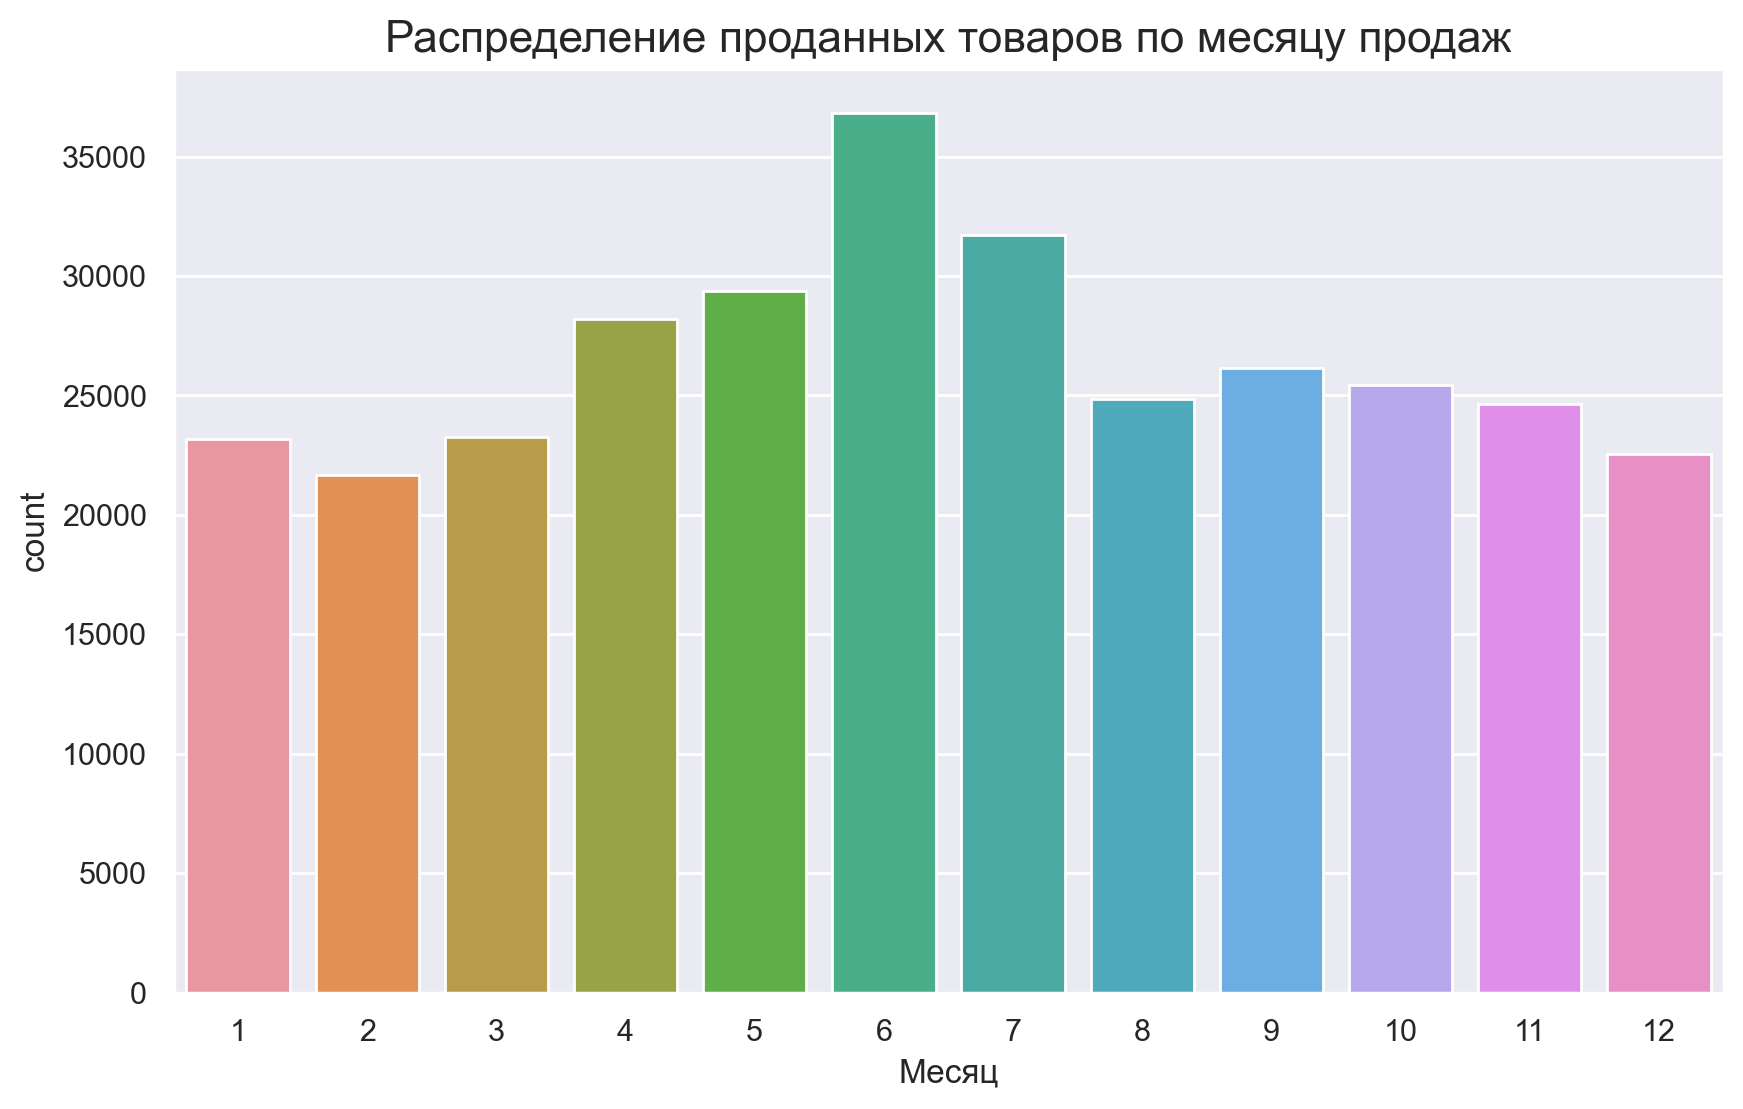

In [25]:
#Построение столбчатой диаграммы
sns.set()
ax = sns.countplot(x = "Месяц", data = df_rating)
ax = ax.set_xticklabels(ax.get_xticklabels())
plt.title('Распределение проданных товаров по месяцу продаж',fontsize=16)
plt.show()

In [26]:
#Вывод количества проданных товаров по месяцам
df_rating1 = df_rating.groupby('Месяц').count().sort_values(['article_id'],ascending=False)
df_rating1.drop(columns = ['t_dat', 'price', 'customer_id'], axis = 1) 

,article_id
Месяц,
6,36848
7,31698
5,29381
4,28219
9,26160
10,25427
8,24846
11,24634
3,23267


Пик продаж наблюдался в периоде май-июль

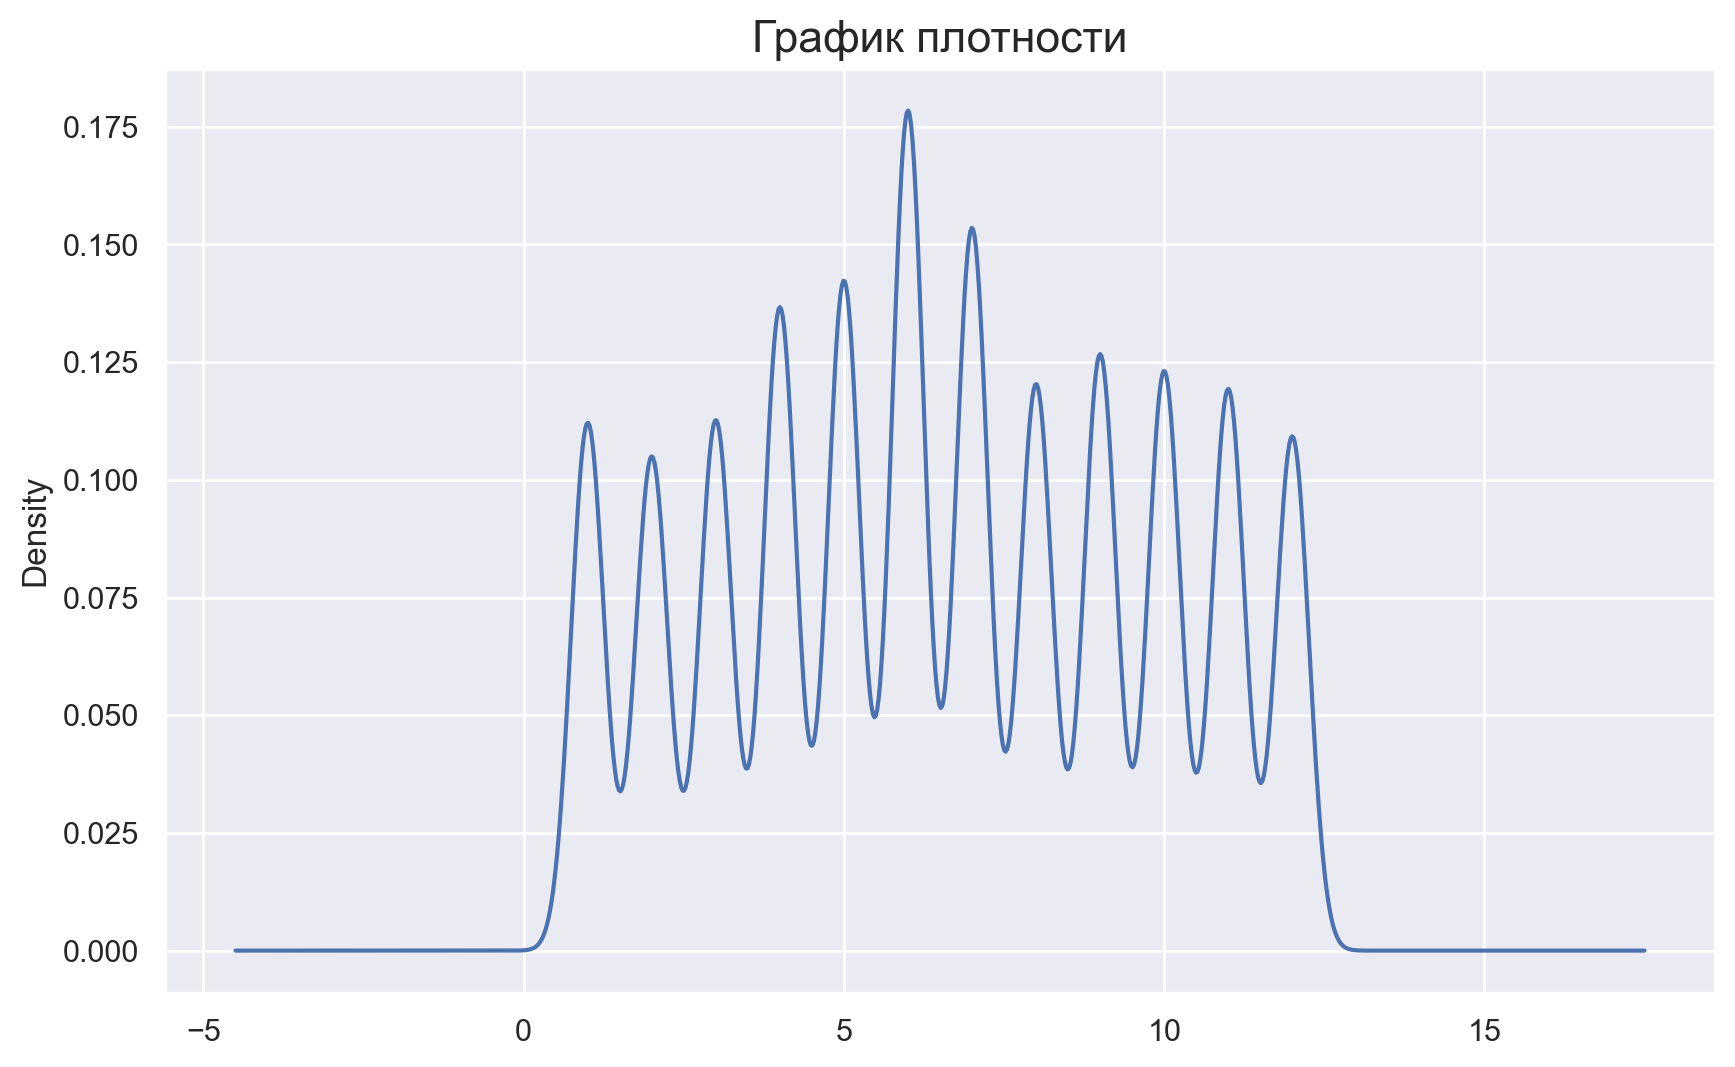

In [27]:
# Построение графика плотности
df_rating['Месяц'].plot(kind='density')
plt.title('График плотности',fontsize=16)
plt.show()


## 4.2.Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму

In [28]:
#Шаг 4. Разведочный (исследовательский) анализ данных
#2.Определить список товаров ТОП-10 с максимальной выручкой за все время, построить столбчатую диаграмму
df_prices = df_rating[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False) \
            .rename(columns={"price":"выручка"} ) \
            .reset_index()
df_prices = df_prices.merge(df_item, how='left', left_on='article_id', right_on='article_id') \
            .sort_values(['выручка'],ascending=False)
df_prices.head(10)

,article_id,выручка,product_name,color
0,706016001,16364.05,Trousers,Black
1,706016002,11309.68,Trousers,Light Blue
2,568601006,9659.58,Blazer,Black
3,448509014,7720.95,Trousers,Blue
4,706016003,7001.72,Trousers,Dark Blue
5,562245046,6886.59,Trousers,Black
6,661794001,6848.58,Coat,Light Beige
7,399223001,6772.23,Trousers,Black
8,720125001,6312.63,Leggings/Tights,Black
9,562245001,5761.51,Trousers,Black


In [29]:
# Вывод топ-10
df_short = df_prices[:10][['выручка','product_name','article_id','color']]

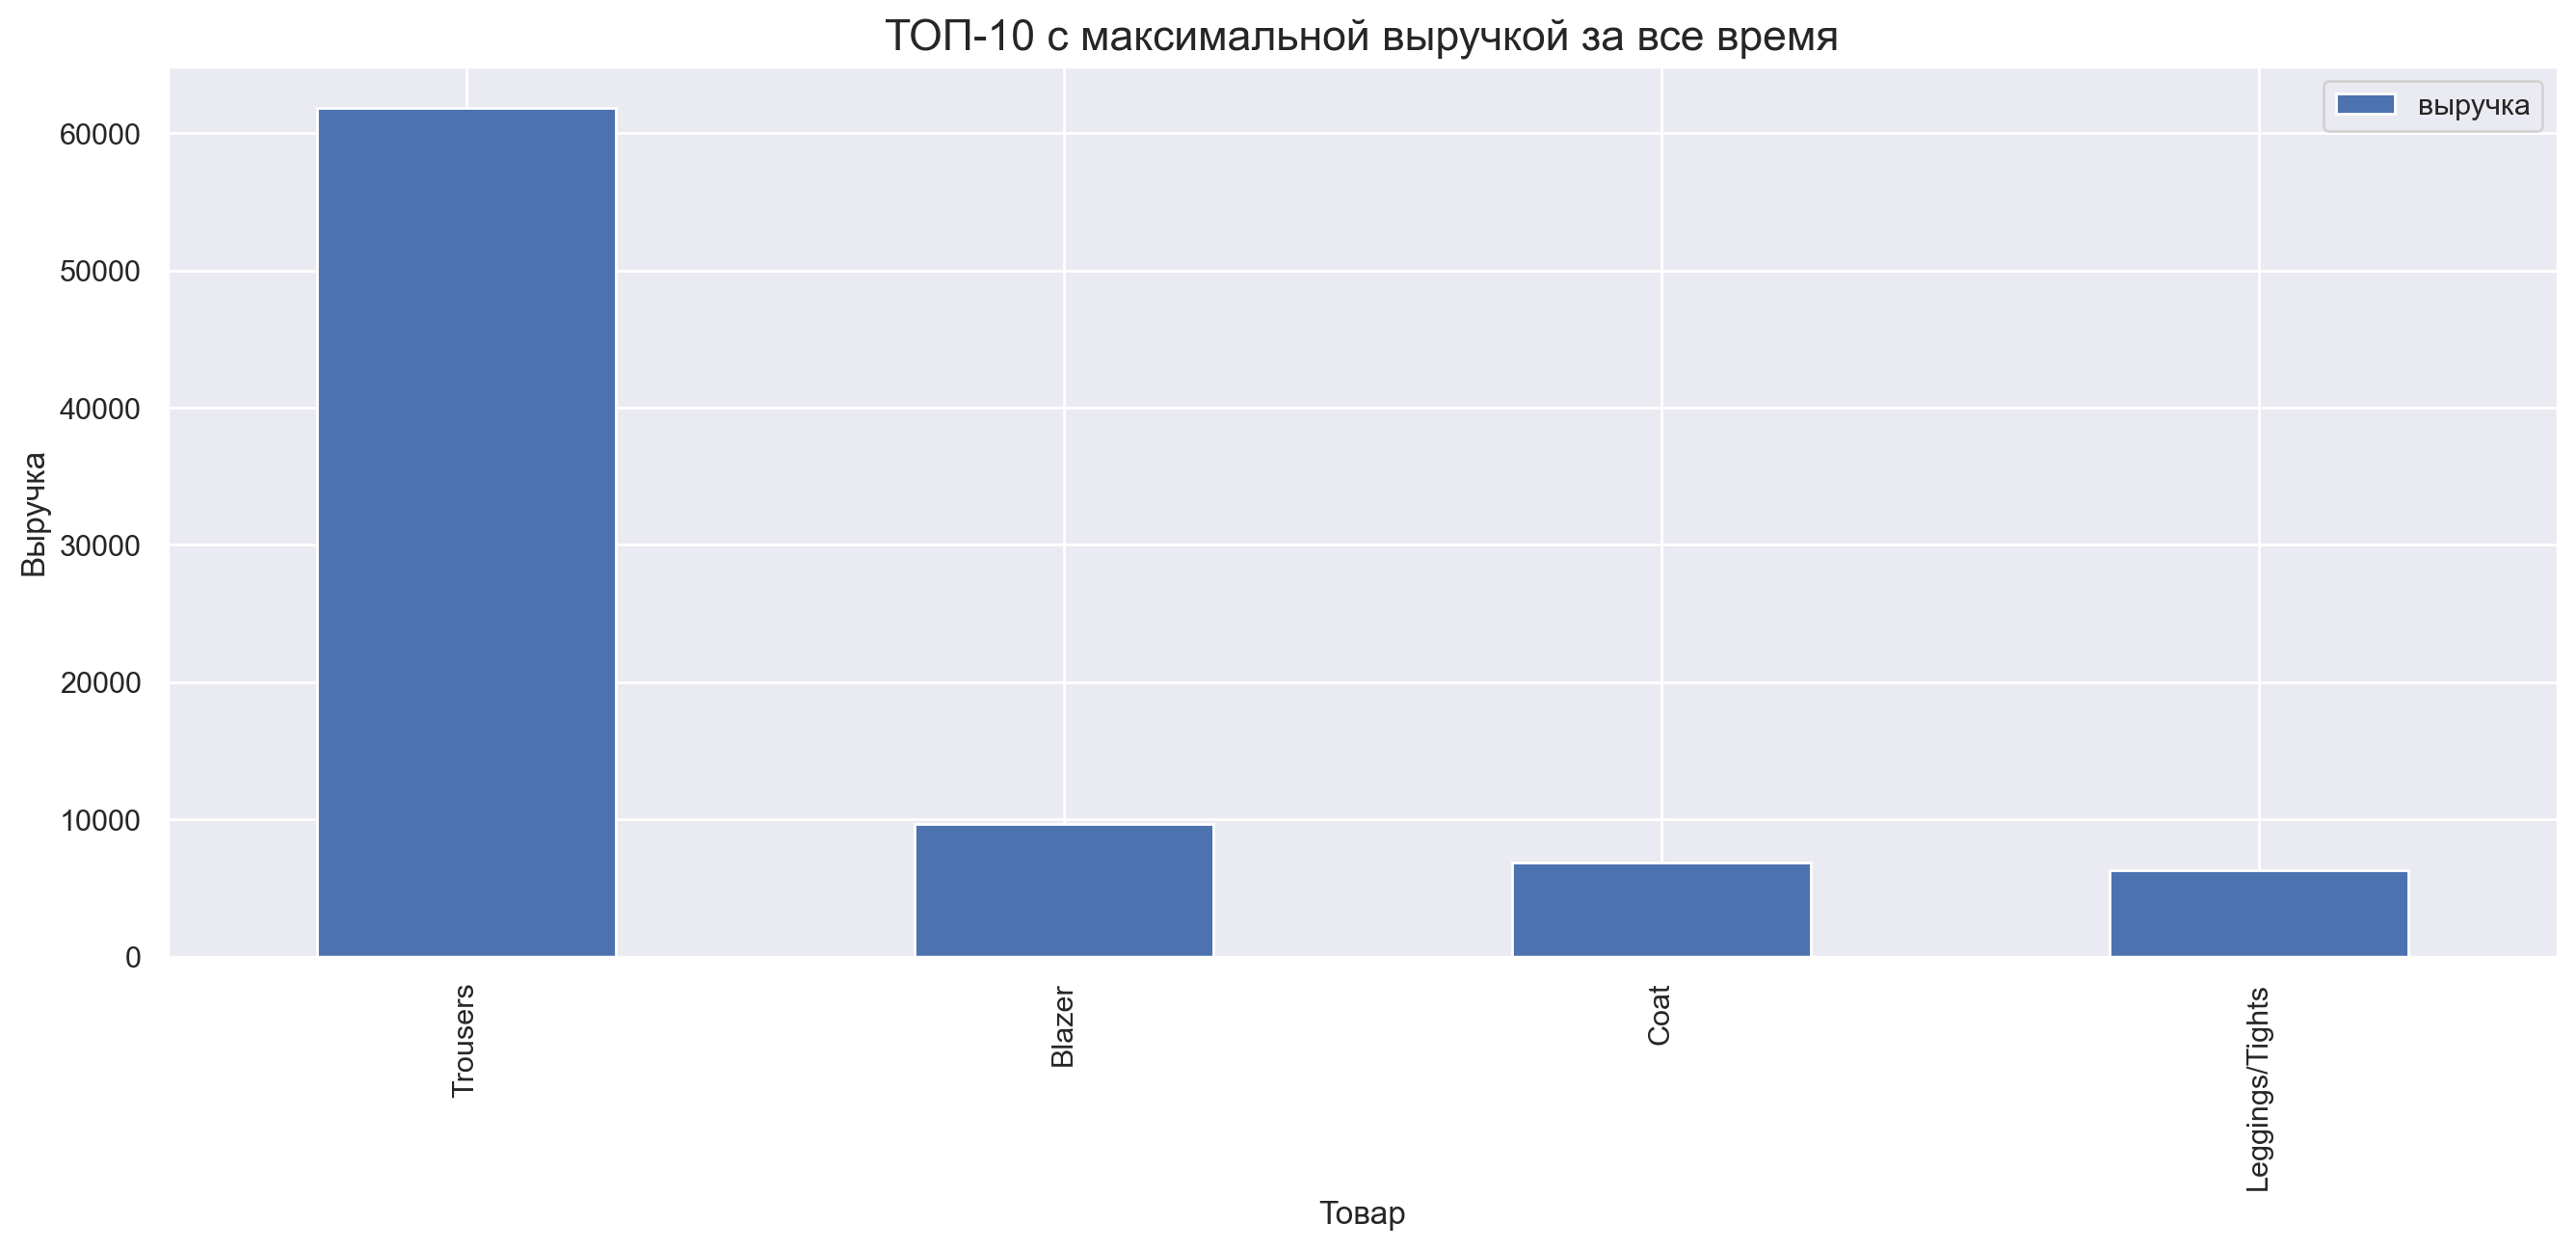

In [30]:
#Построение диаграммы
fig, ax = plt.subplots(figsize=(16, 6))
platform_on_sales = df_short.groupby('product_name')['выручка'] \
    .agg(выручка = 'sum').sort_values(by='выручка', ascending=False)
platform_on_sales.plot.bar(ax=ax);
plt.xlabel('Товар')
plt.ylabel('Выручка')
plt.title('ТОП-10 с максимальной выручкой за все время',fontsize=16)
plt.show();


Очевидно, что категория product_name имеет разновидности по другим признакам (color и article_id).Выполняем следующие преобразования

In [31]:
# Преобразование article_id в тип string и объединение столбцов
df_short['article_id'] = df_short['article_id'].astype(str)
df_short['Топ товаров'] = df_short['product_name'] +"  " +df_short['color']+"  " +df_short['article_id'] 

In [32]:
# Вывод топ-10
df_short.head(10)

,выручка,product_name,article_id,color,Топ товаров
0,16364.05,Trousers,706016001,Black,Trousers Black 706016001
1,11309.68,Trousers,706016002,Light Blue,Trousers Light Blue 706016002
2,9659.58,Blazer,568601006,Black,Blazer Black 568601006
3,7720.95,Trousers,448509014,Blue,Trousers Blue 448509014
4,7001.72,Trousers,706016003,Dark Blue,Trousers Dark Blue 706016003
5,6886.59,Trousers,562245046,Black,Trousers Black 562245046
6,6848.58,Coat,661794001,Light Beige,Coat Light Beige 661794001
7,6772.23,Trousers,399223001,Black,Trousers Black 399223001
8,6312.63,Leggings/Tights,720125001,Black,Leggings/Tights Black 720125001
9,5761.51,Trousers,562245001,Black,Trousers Black 562245001


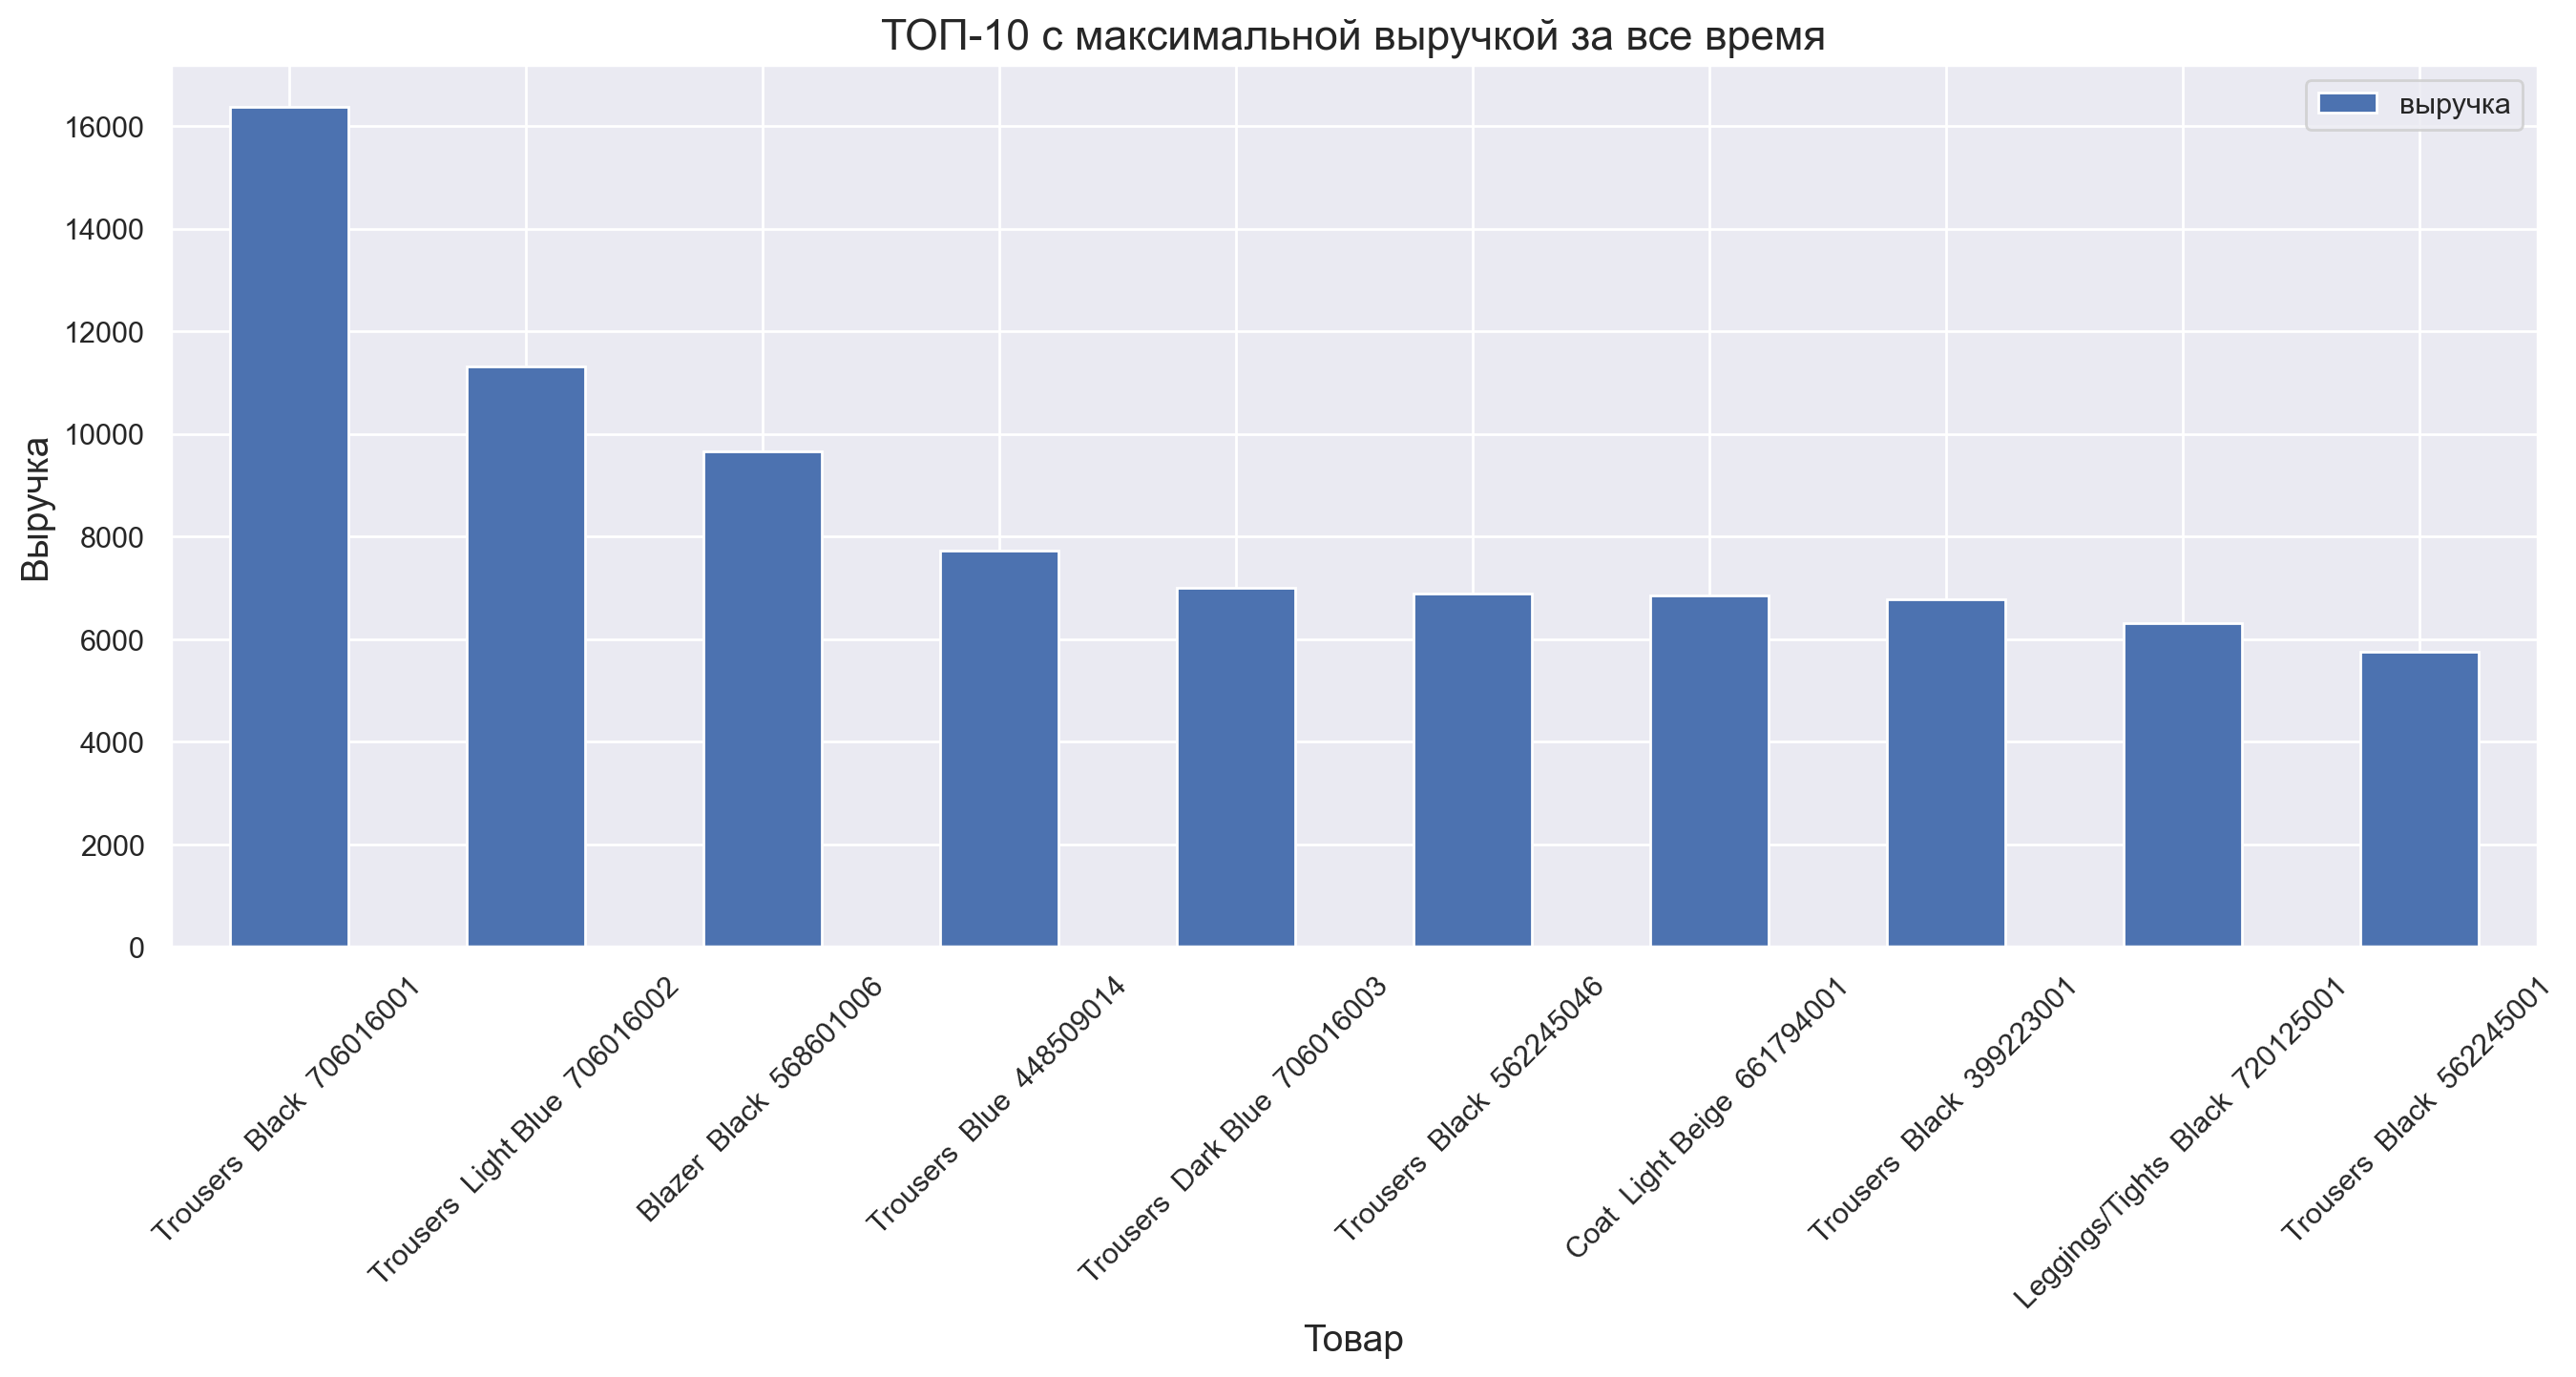

In [33]:
# Построение столчатой диаграммы топ-10
fig, ax = plt.subplots(figsize=(16, 6))
TOP_revenue = df_short.groupby('Топ товаров')['выручка'] \
    .agg(выручка = 'sum').sort_values(by='выручка', ascending=False)
TOP_revenue.plot.bar(ax=ax);
plt.xlabel('Товар', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.title('ТОП-10 с максимальной выручкой за все время',fontsize=16)
plt.xticks(rotation=45)
plt.show();

## 4.3.Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму

In [34]:
#Шаг 4. Разведочный (исследовательский) анализ данных
#3.Определить список популярных товаров ТОП-10 за все время, построить столбчатую диаграмму
df_item.head()

,article_id,product_name,color
0,108775015,Vest top,Black
1,108775044,Vest top,White
2,110065001,Bra,Black
3,110065002,Bra,White
4,110065011,Bra,Light Beige


In [35]:
#ОБъединение датафреймов для получения искомых результатов 
df_rating1=df_rating.groupby(['article_id']).article_id.count().sort_values(ascending = False).reset_index(
    name = 'count').merge(df_item, how ='left', on = 'article_id')
df_rating1.head(100)

,article_id,count,product_name,color
0,706016001,506,Trousers,Black
1,706016002,348,Trousers,Light Blue
2,372860001,295,Socks,Black
3,759871002,275,Vest top,Black
4,610776002,275,T-shirt,Black
...,...,...,...,...
95,539723001,97,Trousers,Black
96,759465001,96,Belt,Black
97,762846008,96,Shirt,Light Pink
98,714790020,96,Trousers,Blue


In [36]:
df_rating1.short=df_rating1[:10]

In [37]:
df_rating1.short['article_id'] = df_rating1.short['article_id'].astype(str)
df_rating1.short['Топ товаров'] = df_rating1.short['product_name'] +"  "  +df_rating1.short['article_id'] 

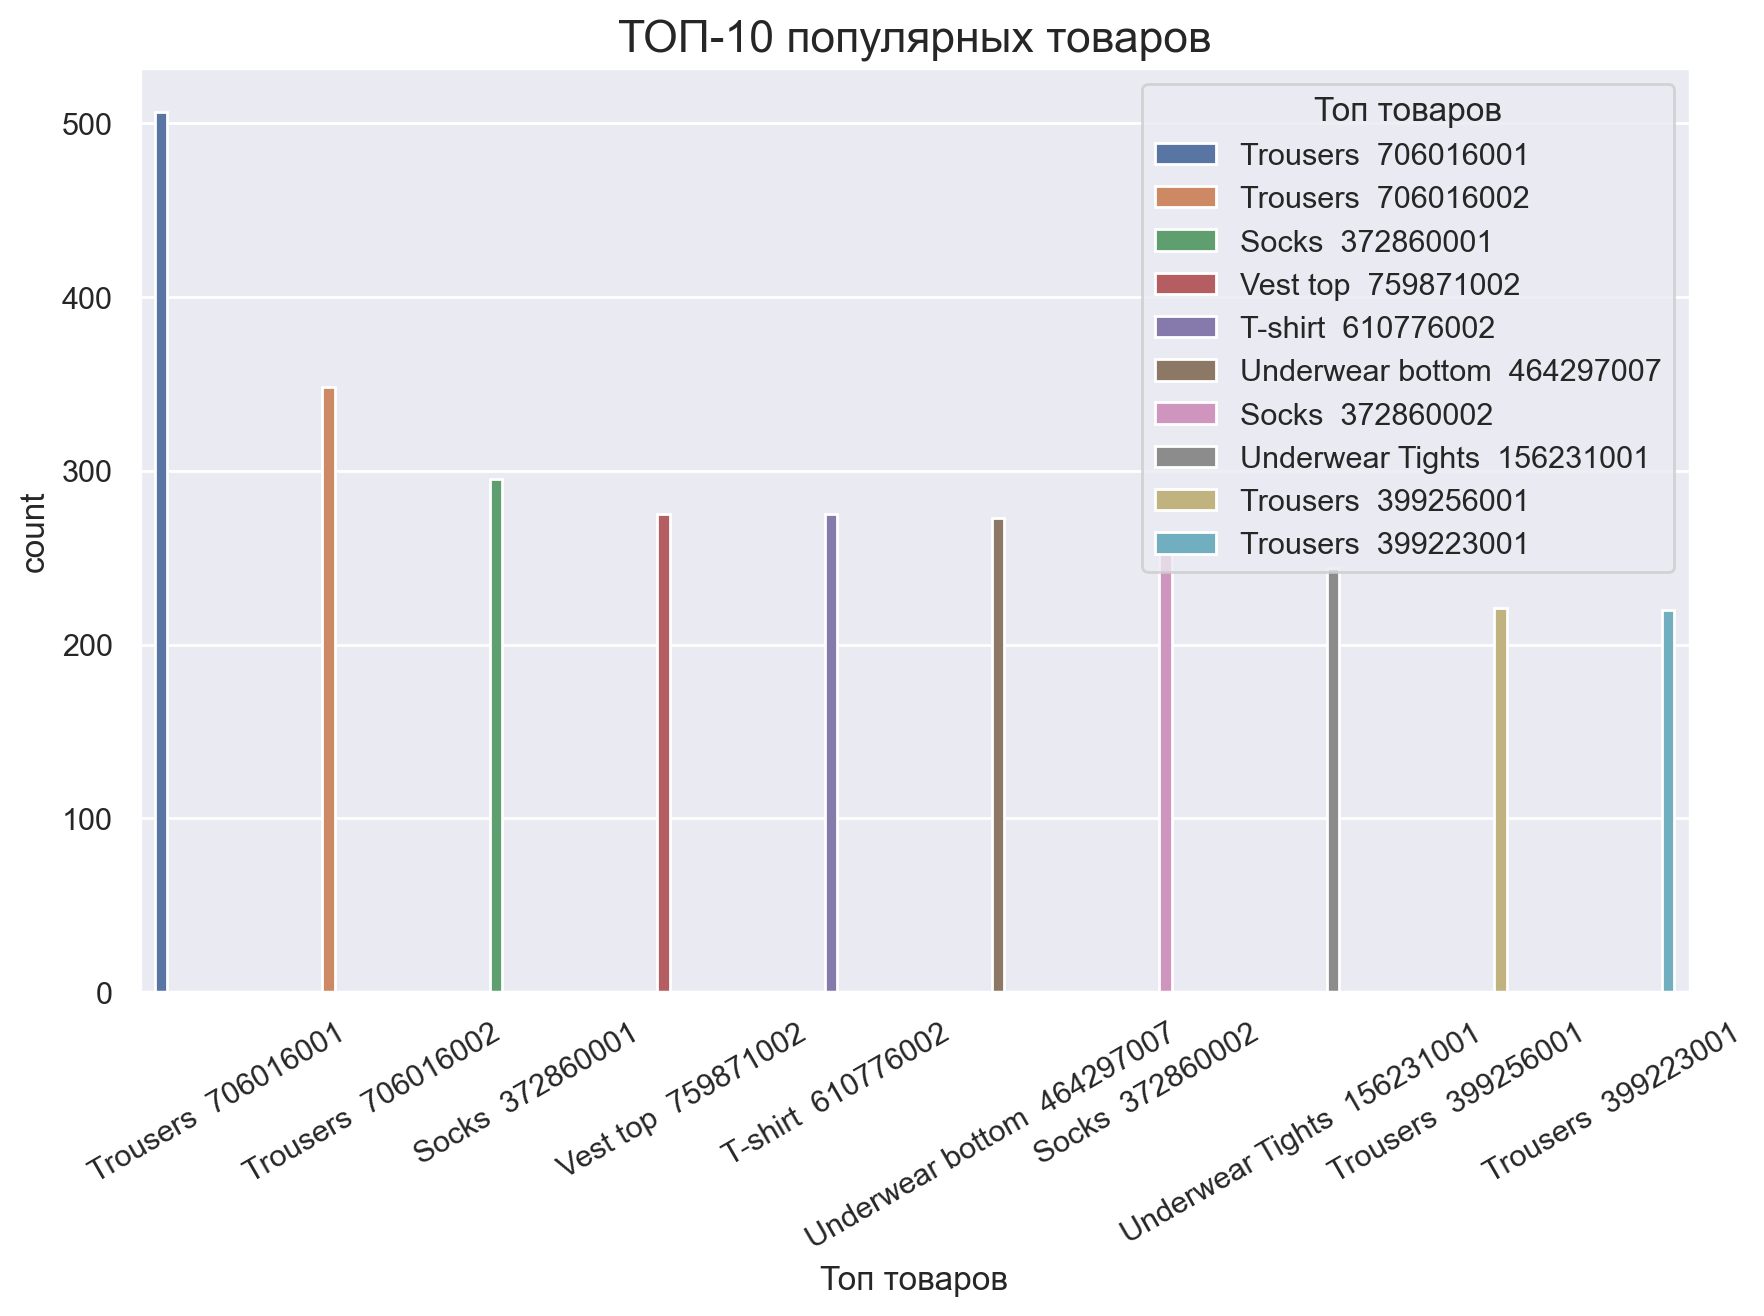

In [38]:
# Построение столбчатой диаграммы
sns.barplot(x='Топ товаров', y='count', hue='Топ товаров', data=df_rating1.short)
plt.xticks(rotation=30)
plt.title('ТОП-10 популярных товаров',fontsize=16)
plt.show()

## 4.4.Определить долю товаров, которые были проданы один раз, построить круговую диаграмму

In [39]:
#Шаг 4. Разведочный (исследовательский) анализ данных
#4.Определить долю товаров, которые были проданы один раз, построить круговую диаграмму
#data_names = pd.Series(df.Признак1.unique())
#plt.pie(df, autopct='%.1f', labels=data_names)
sales_freq = df_rating.groupby(['article_id']).article_id.count().sort_values(ascending = False).reset_index(
    name = 'count').merge(df_item, how ='left', on = 'article_id')
sales_freq['one-time-sale'] = sales_freq['count'].apply(lambda x: True if x == 1 else False)
sales_freq.groupby('one-time-sale').article_id.count()
sales_freq1=sales_freq.groupby('one-time-sale').article_id.count()

In [40]:
sales_freq1.head()

one-time-sale
False    37145
True     16481
Name: article_id, dtype: int64

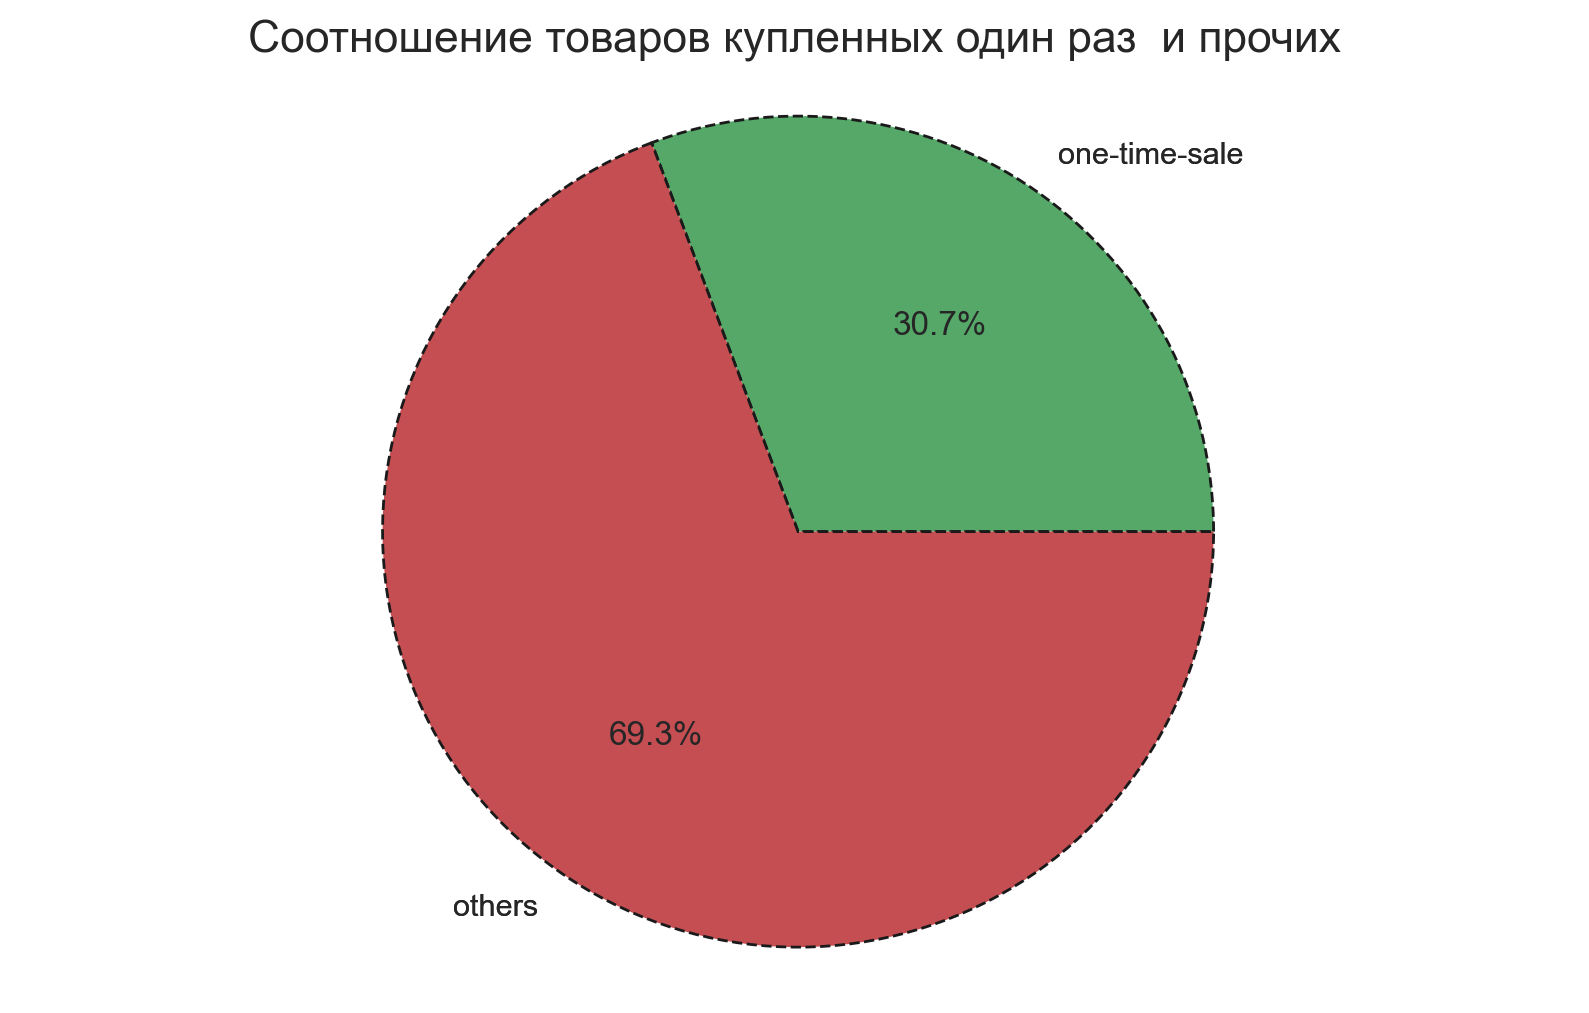

In [41]:
# построение круговой диаграммы
labels=['one-time-sale','others']
vals=[16481,37145]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=False, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=False)
ax.axis("equal")
plt.title('Соотношение товаров купленных один раз  и прочих',fontsize=16)
plt.show()

## 4.5.Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму

In [42]:
#Шаг 4. Разведочный (исследовательский) анализ данных
#5.Определить какая возрастная группа покупает больше товаров, группы формировать с шагом 10 лет, построить столбчатую диаграмму и график плотности распределения
import math
df_user['age_group'] = df_user['age'].apply(lambda x: math.ceil(x / 10.0) * 10) #округляем до ближайшей десятки вверх
df_user['age_group'] = df_user['age_group'].apply(lambda x: str(x-9) + '-' + str(x)) #имя группы ближайшая десятка - 9
df_user.groupby('age_group').age_group.count().reset_index(name = 'count')

,age_group,count
0,11-20,12480
1,21-30,97642
2,31-40,39267
3,41-50,37160
4,51-60,34133
5,61-70,7673
6,71-80,1327


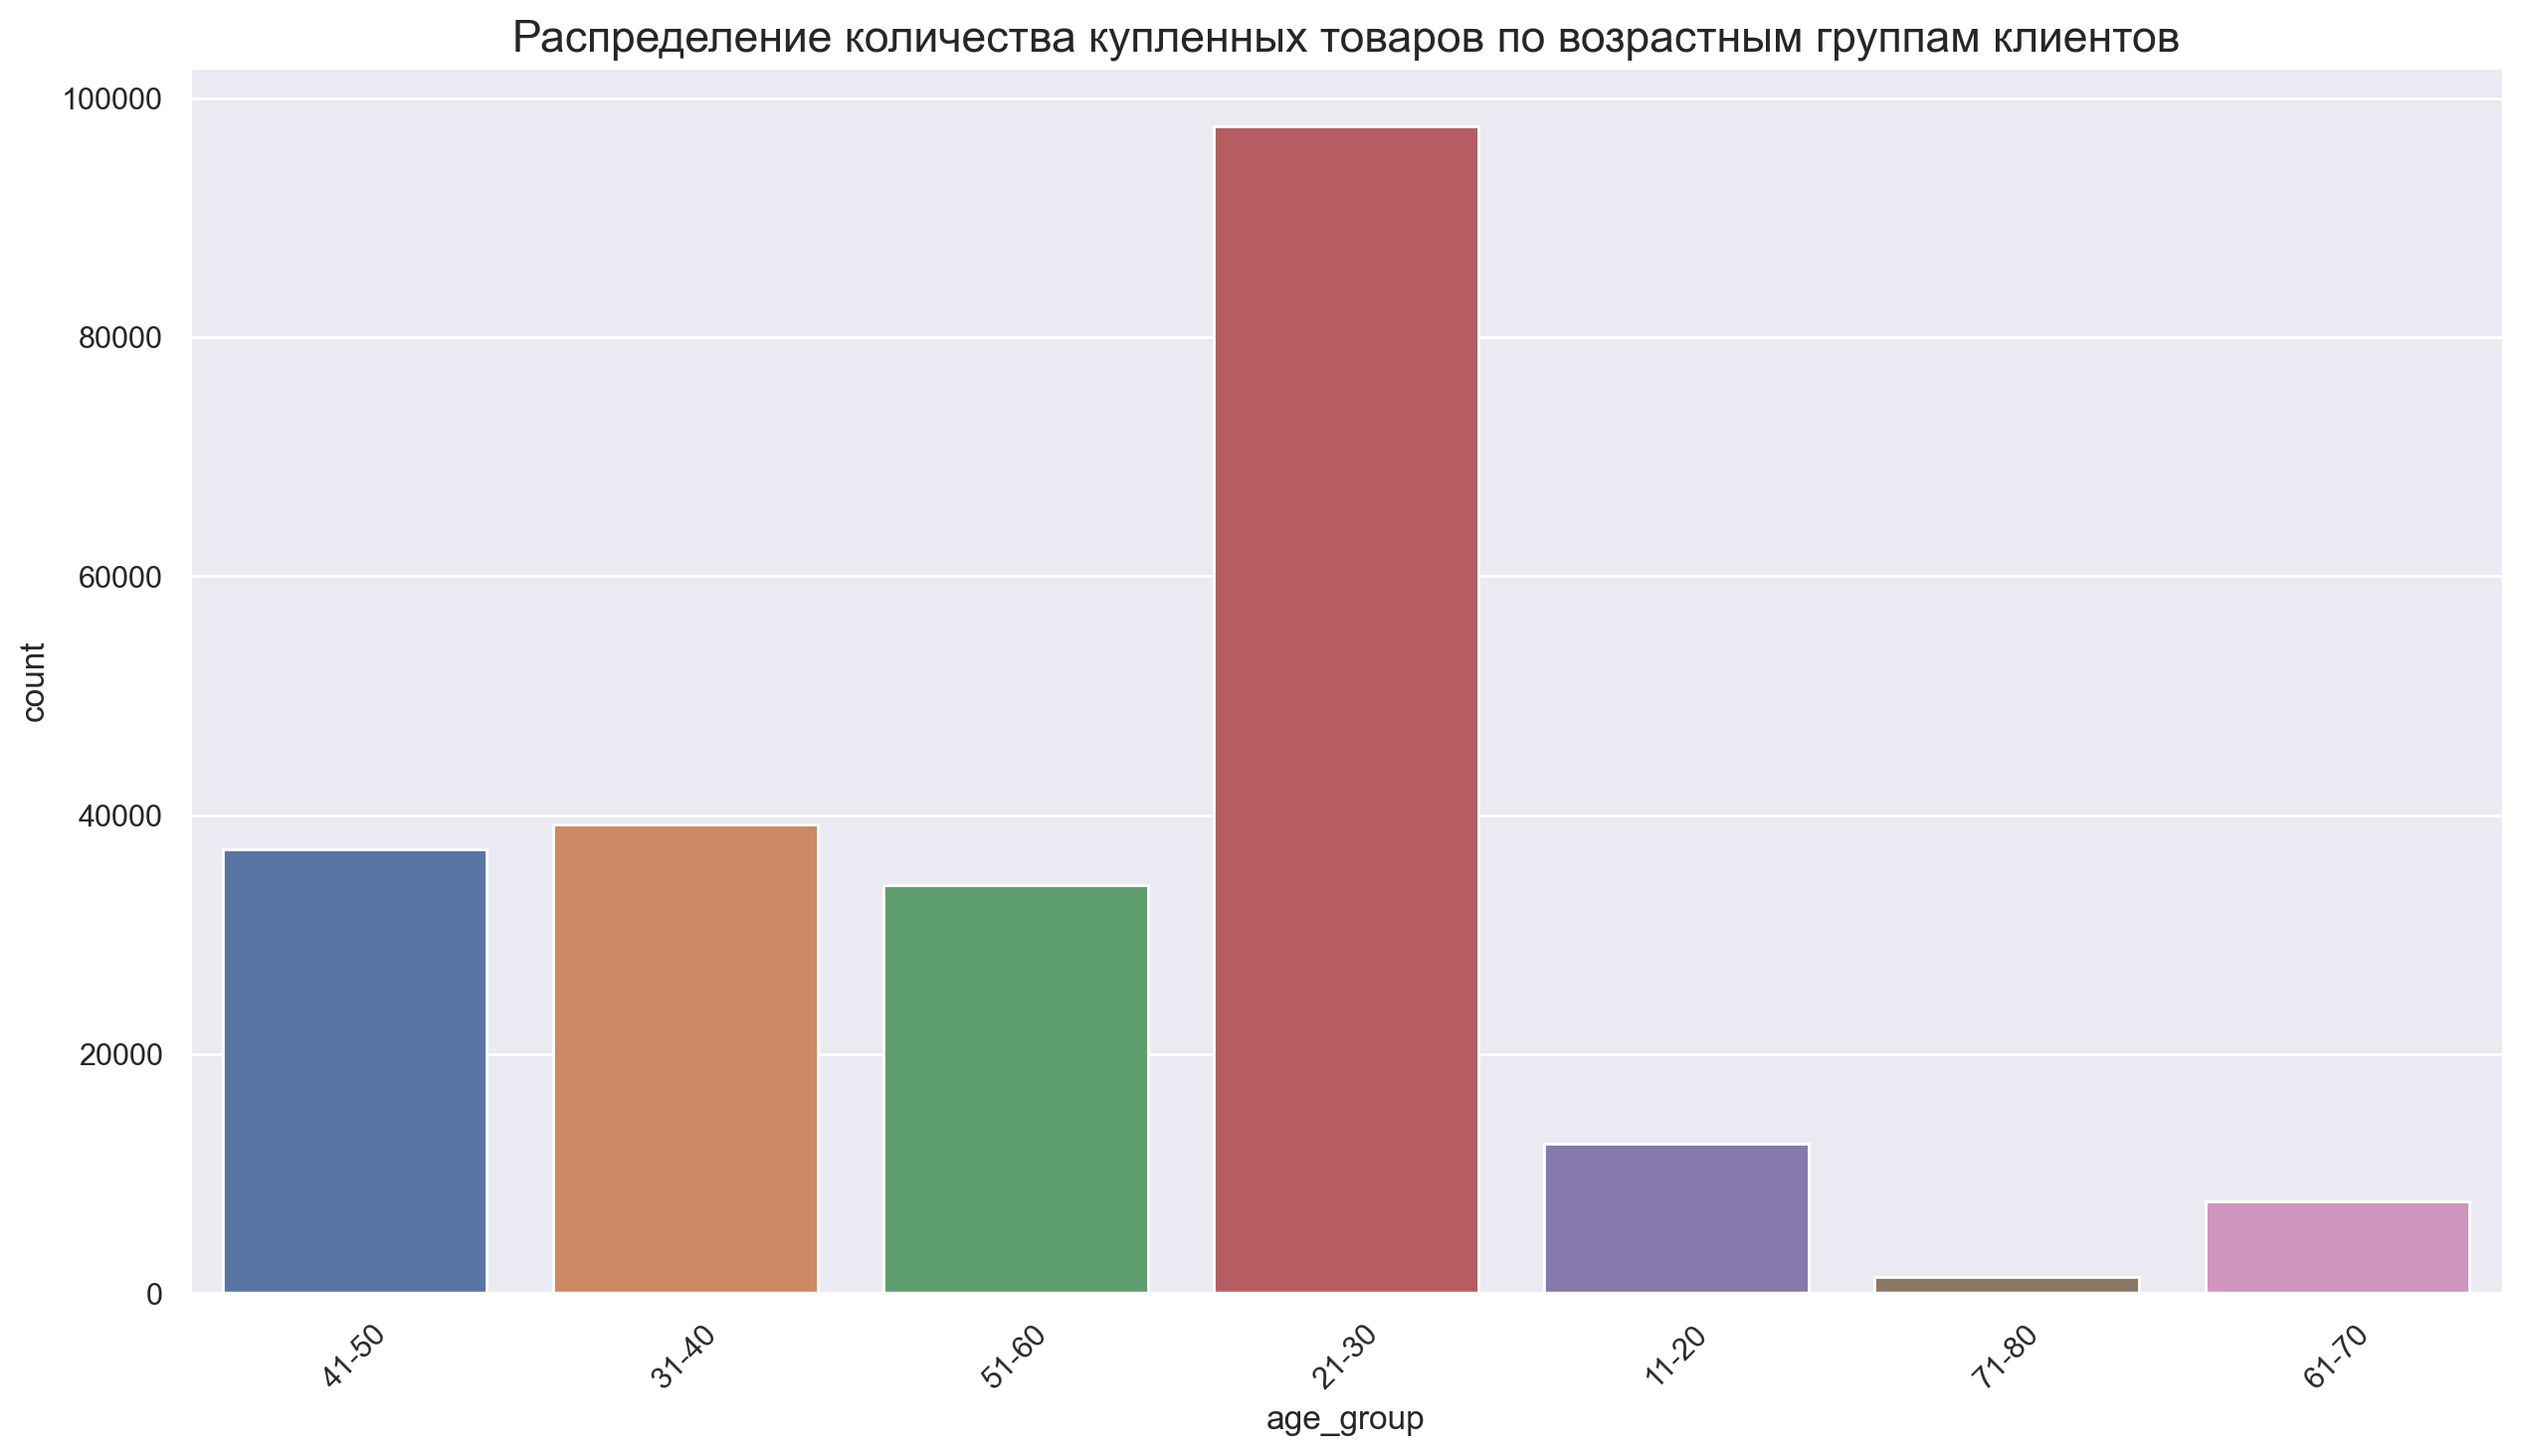

In [43]:
# Построение диграммы
plt.figure(figsize=(15, 8))
sns.set()
ax = sns.countplot(x = "age_group", data = df_user)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title('Распределение количества купленных товаров по возрастным группам клиентов',fontsize=16)
plt.show()

Наиболее часто покупки совершают лица, состоящие в возрастнйо группе 21-30 лет

## 4.6.Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить столбчатую диаграмму

In [44]:
#Шаг 4. Разведочный (исследовательский) анализ данных
#6.Определить покупают ли больше товаров те, кто активно следит за новостями о моде, построить стобчатую диаграмму
df_cust_qty = df_rating["customer_id"].value_counts().reset_index() \
            .rename(columns = {"customer_id":"sold_qty","index":"customer_id"})
df_cust_qty = df_cust_qty.merge(df_user, how='left', left_on='customer_id', right_on='customer_id') \
            .sort_values(['sold_qty'],ascending=False)
df_cust_qty

,customer_id,sold_qty,club_member,fashion_news,age,age_group
0,23883,21,ACTIVE,Regularly,61.0,61-70
2,7232,19,ACTIVE,Regularly,54.0,51-60
1,2458,19,ACTIVE,NONE,31.0,31-40
3,5919,17,ACTIVE,Regularly,28.0,21-30
4,18097,16,ACTIVE,NONE,43.0,41-50
...,...,...,...,...,...,...
115089,198576,1,ACTIVE,NONE,61.0,61-70
115090,205582,1,ACTIVE,Regularly,61.0,61-70
115091,205581,1,ACTIVE,Regularly,23.0,21-30
115092,198577,1,ACTIVE,NONE,22.0,21-30


In [45]:
df_cust_qty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229804 entries, 0 to 229803
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_id   229804 non-null  int64  
 1   sold_qty      229804 non-null  int64  
 2   club_member   229682 non-null  object 
 3   fashion_news  229682 non-null  object 
 4   age           229682 non-null  float64
 5   age_group     229682 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.3+ MB


In [46]:
df_cust_qty1 = df_cust_qty[['sold_qty','fashion_news']]
df_cust_qty1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229804 entries, 0 to 229803
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   sold_qty      229804 non-null  int64 
 1   fashion_news  229682 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.3+ MB


In [47]:
df_cust_qty1.head(10)

,sold_qty,fashion_news
0,21,Regularly
2,19,Regularly
1,19,NONE
3,17,Regularly
4,16,NONE
5,16,NONE
6,16,Regularly
7,15,Regularly
8,15,Regularly
9,14,Regularly


In [48]:
#fashion_news.groupby('fashion_news').fashion_news.count().reset_index(name = 'count')

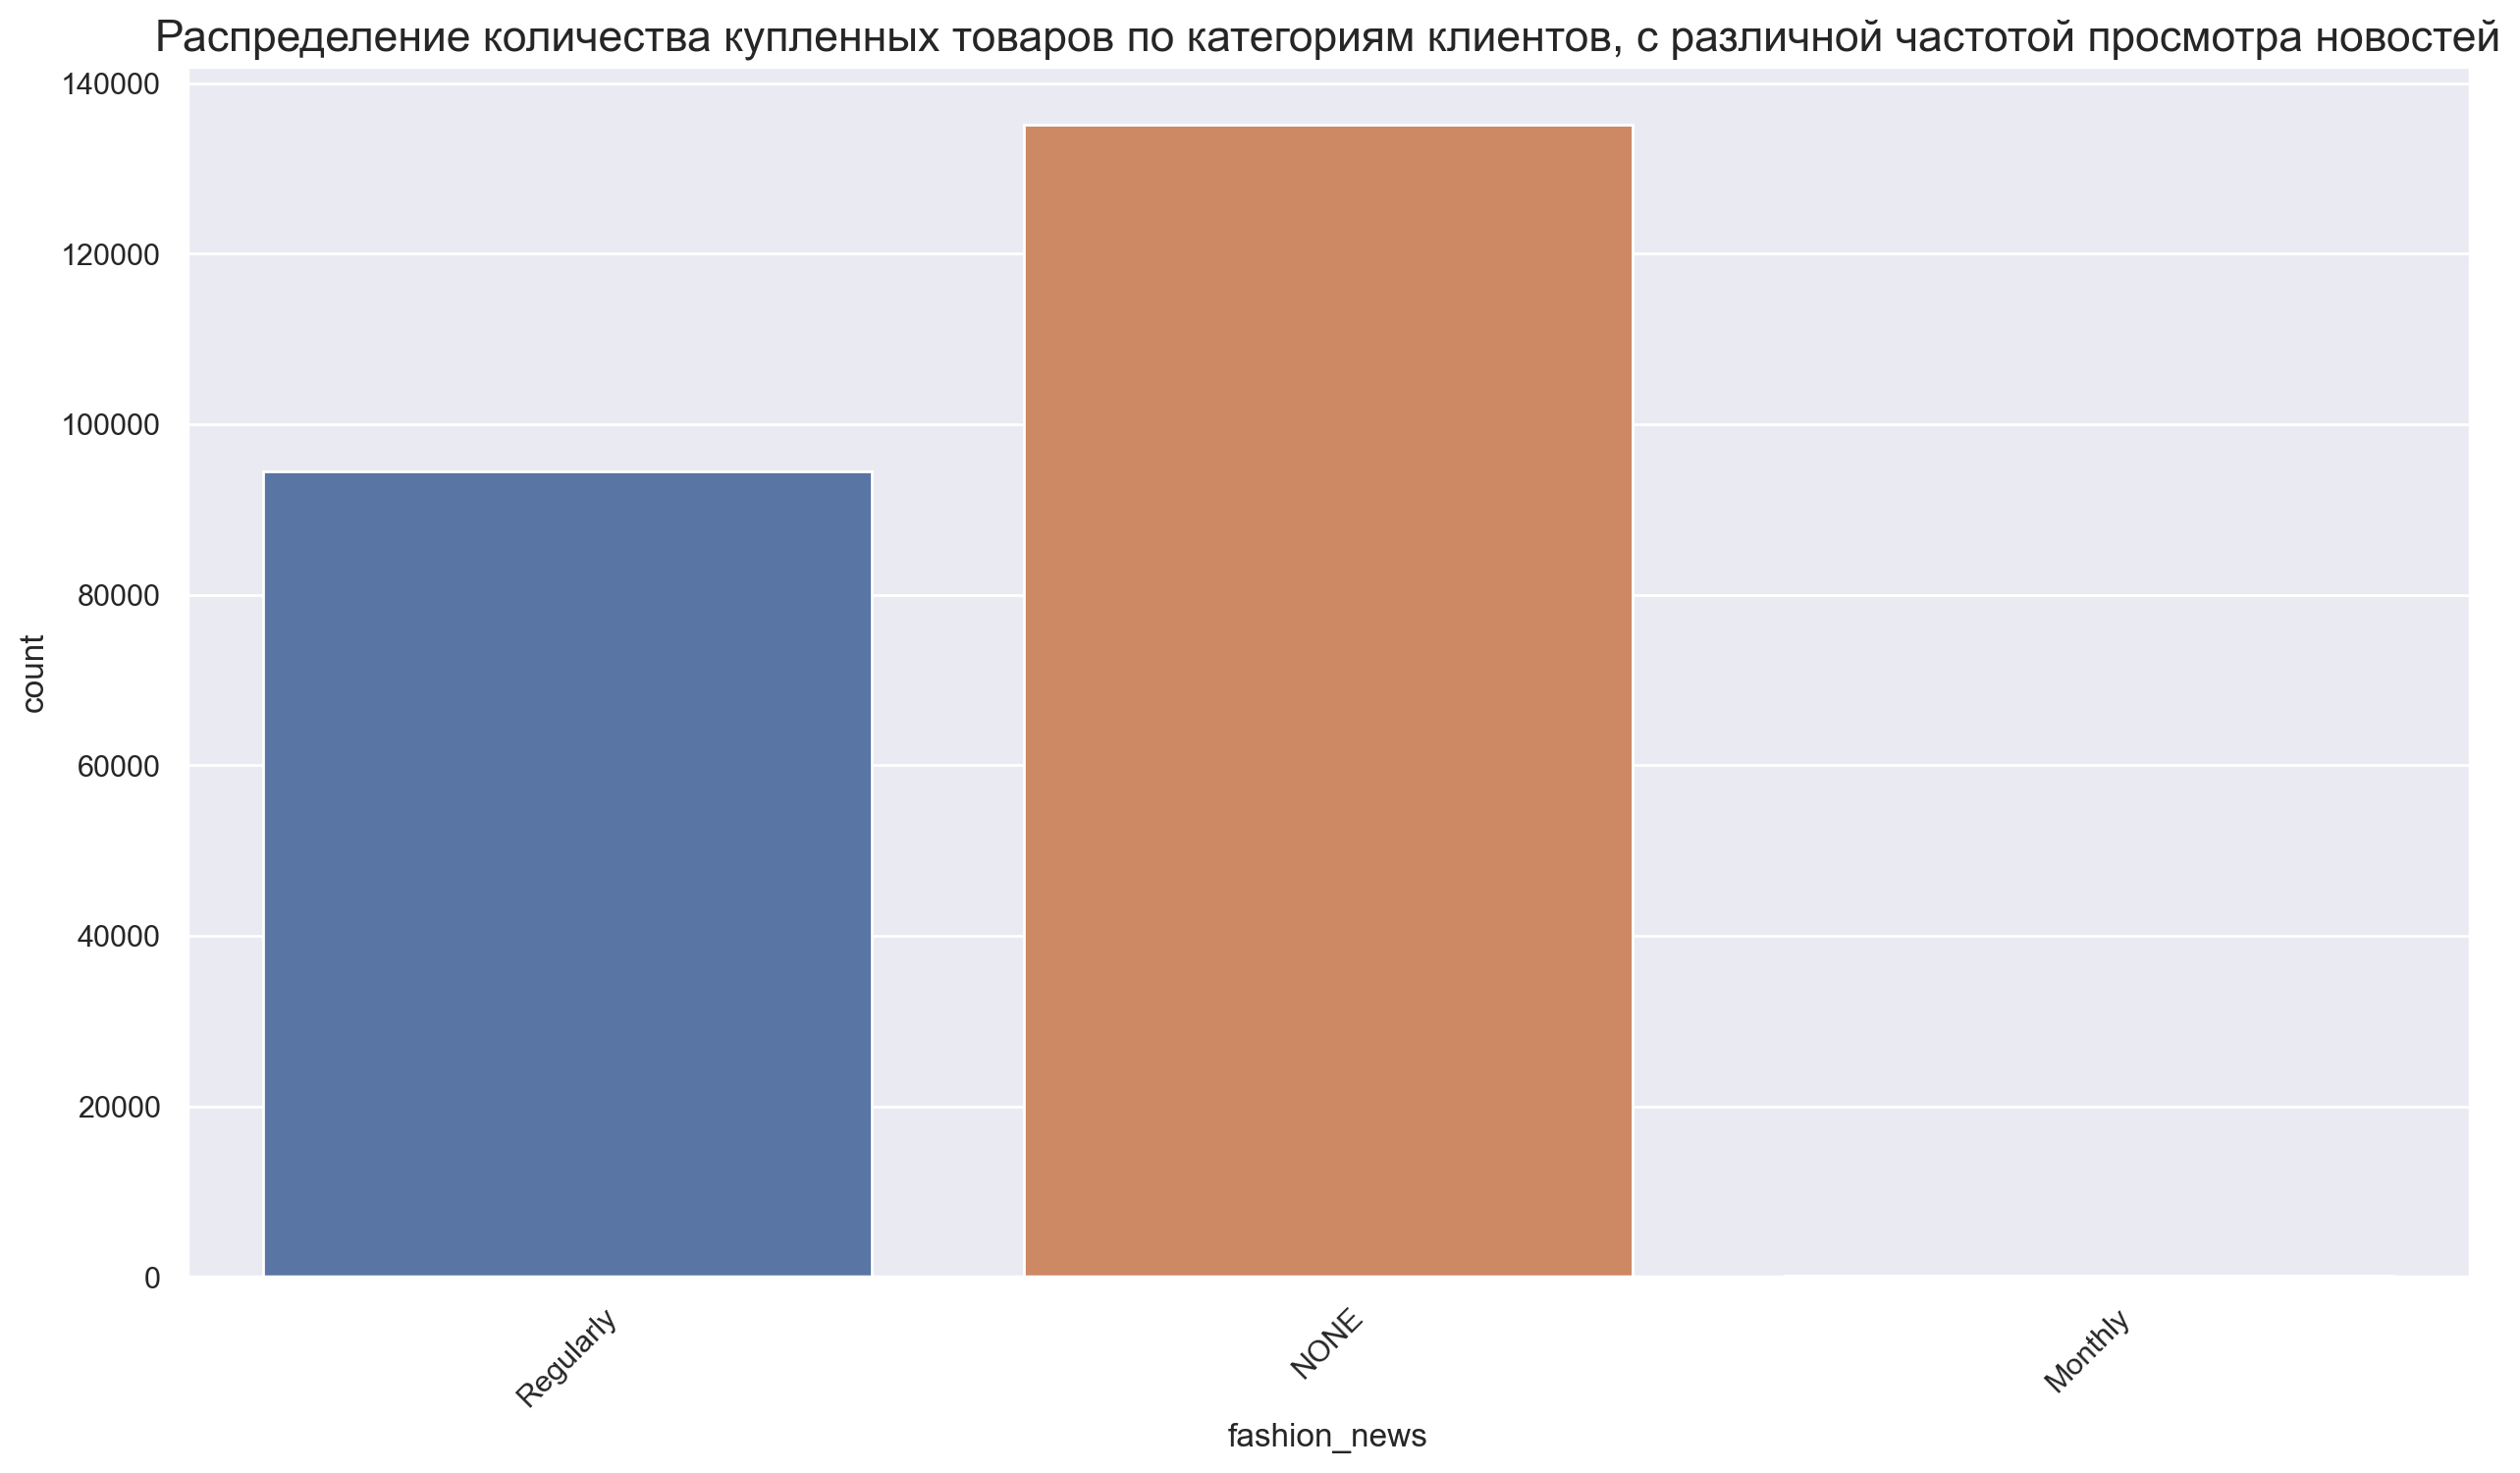

In [49]:
plt.figure(figsize=(15, 8))
sns.set()
ax = sns.countplot(x = "fashion_news", data =df_cust_qty1)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title('Распределение количества купленных товаров по категориям клиентов, с различной частотой просмотра новостей',fontsize=16)
plt.show()

Больше товаров куплено клиентами, не следящими за новостями

# Шаг 5. Анализ взаимосвязи признаков

In [50]:
#Шаг 5. Анализ взаимосвязи признаков
#1.Проверить гипотезу о данных - влияет ли статус членства клуба на количество купленных товаров, найти p-value, сформулировать вывод
import scipy.stats as st
from statsmodels.api import stats
users = df_rating.groupby('customer_id').customer_id.count().reset_index(name='n_purchases').merge(df_user, 
                                                                                         on = 'customer_id')#\
            #.reset_index()
users.drop(columns = ['fashion_news', 'age', 'age_group'], inplace = True)
users


,customer_id,n_purchases,club_member
0,0,2,PRE-CREATE
1,1,1,ACTIVE
2,2,1,ACTIVE
3,3,1,ACTIVE
4,4,2,ACTIVE
...,...,...,...
229677,229799,1,ACTIVE
229678,229800,1,ACTIVE
229679,229801,1,ACTIVE
229680,229802,1,ACTIVE


In [51]:
users5=users
users5.head()

,customer_id,n_purchases,club_member
0,0,2,PRE-CREATE
1,1,1,ACTIVE
2,2,1,ACTIVE
3,3,1,ACTIVE
4,4,2,ACTIVE


In [52]:
users5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229682 entries, 0 to 229681
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  229682 non-null  int64 
 1   n_purchases  229682 non-null  int64 
 2   club_member  229682 non-null  object
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [53]:
users5['club_member']=users5['club_member'].replace({'ACTIVE':2, 'LEFT CLUB':0,'PRE-CREATE':1 })

In [54]:
users5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229682 entries, 0 to 229681
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   customer_id  229682 non-null  int64
 1   n_purchases  229682 non-null  int64
 2   club_member  229682 non-null  int64
dtypes: int64(3)
memory usage: 7.0 MB


In [55]:
users5.head()

,customer_id,n_purchases,club_member
0,0,2,1
1,1,1,2
2,2,1,2
3,3,1,2
4,4,2,2


In [56]:
pd.crosstab(users5['customer_id'], ['club_member'])


col_0,club_member
customer_id,
0,1
1,1
2,1
3,1
4,1
...,...
229799,1
229800,1
229801,1


In [57]:
pd.crosstab(users5['customer_id'], ['n_purchases'])

col_0,n_purchases
customer_id,
0,1
1,1
2,1
3,1
4,1
...,...
229799,1
229800,1
229801,1


In [58]:
pd.crosstab(users5['club_member'], ['n_purchases'])

col_0,n_purchases
club_member,
0,60
1,6000
2,223622


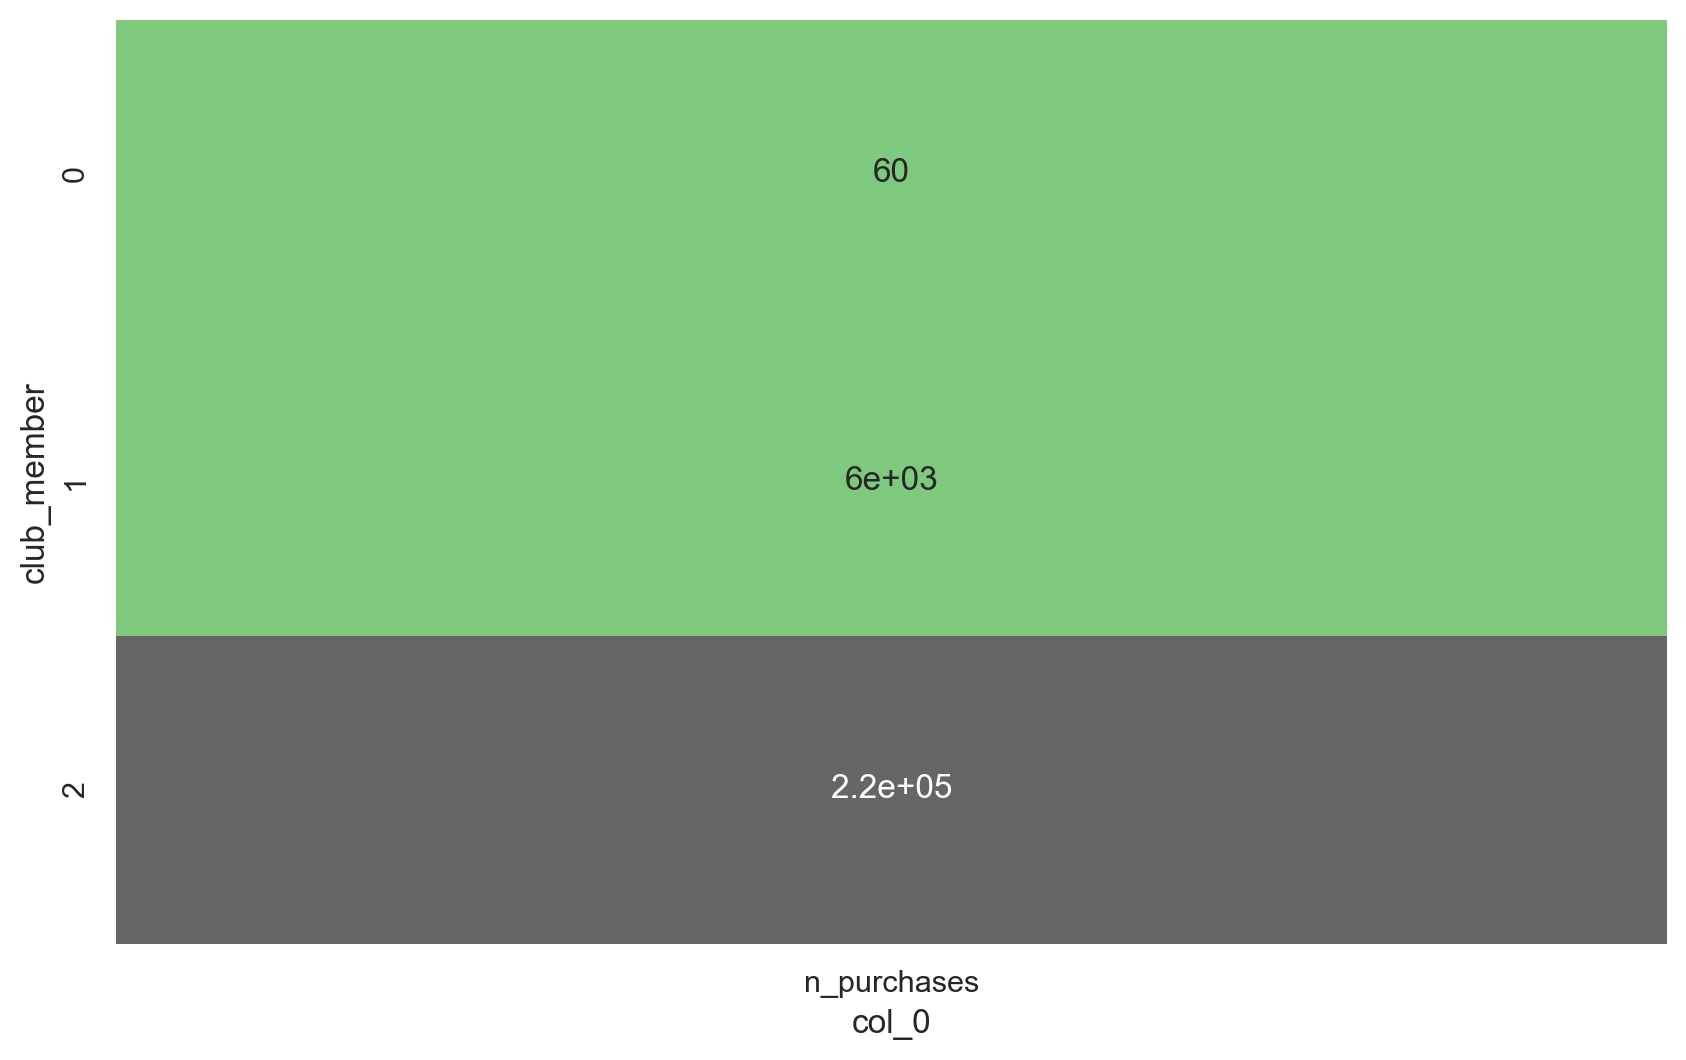

In [59]:
sns.heatmap(pd.crosstab(users5['club_member'],['n_purchases']), 
cmap="Accent", annot=True, cbar=False);

In [60]:
users5['club_member']=users5['club_member'].replace({'2':1, '0':0,'1':0 })

In [61]:
from scipy.stats import chi2_contingency, fisher_exact

In [62]:
pd.crosstab(users5['club_member'], ['n_purchases'])

col_0,n_purchases
club_member,
0,60
1,6000
2,223622


In [63]:
chi2_contingency(pd.crosstab(users5['club_member'], ['n_purchases']))

(0.0,
 1.0,
 0,
 array([[6.00000e+01],
        [6.00000e+03],
        [2.23622e+05]]))

In [64]:
pd.crosstab(users5['club_member'],users5['n_purchases'])

n_purchases,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,21
club_member,,,,,,,,,,,,,,,,,,,
0,50,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5462,454,65,14,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,166468,38854,11595,3973,1517,608,314,138,73,36,18,9,5,5,2,3,1,2,1


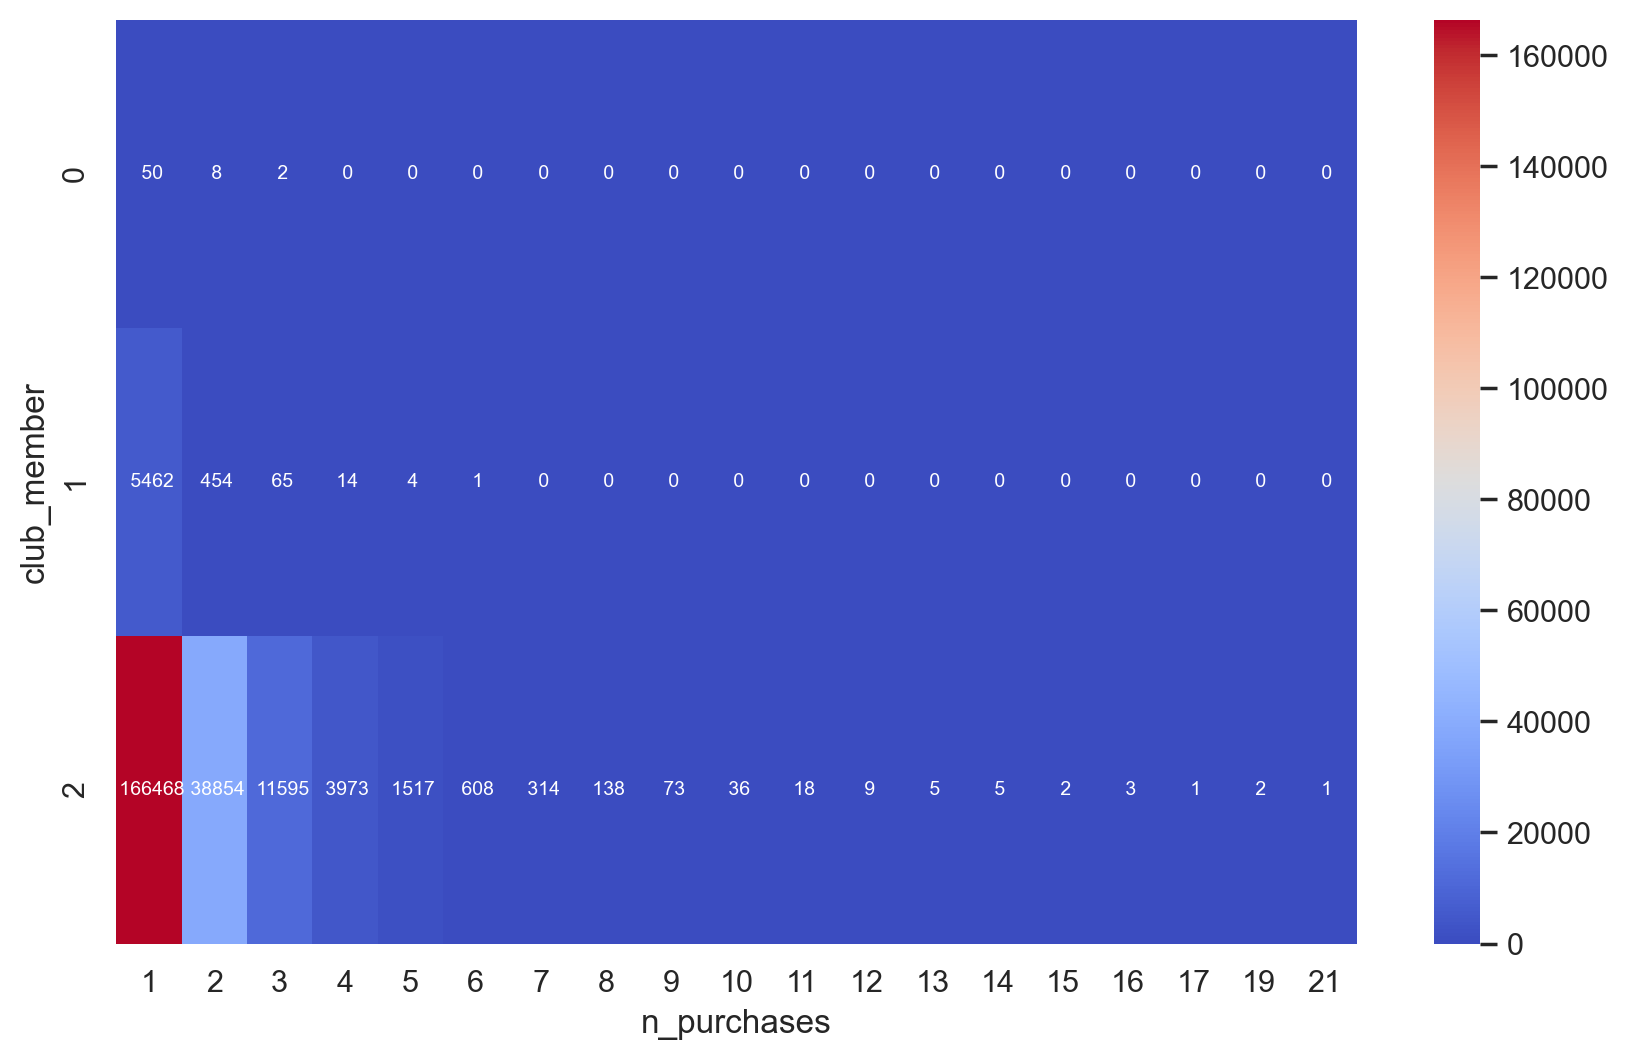

In [65]:
sns.heatmap(pd.crosstab(users5['club_member'],users5['n_purchases']), cmap="coolwarm",annot=True, fmt=" d", annot_kws={"size":7});



In [66]:
chi2_contingency(pd.crosstab(users5['club_member'], users5['n_purchases']))

(883.8599452260012,
 3.2298858221595834e-162,
 36,
 array([[4.49264635e+01, 1.02705480e+01, 3.04647295e+00, 1.04152698e+00,
         3.97331963e-01, 1.59089524e-01, 8.20264540e-02, 3.60498428e-02,
         1.90698444e-02, 9.40430682e-03, 4.70215341e-03, 2.35107671e-03,
         1.30615373e-03, 1.30615373e-03, 5.22461490e-04, 7.83692235e-04,
         2.61230745e-04, 5.22461490e-04, 2.61230745e-04],
        [4.49264635e+03, 1.02705480e+03, 3.04647295e+02, 1.04152698e+02,
         3.97331963e+01, 1.59089524e+01, 8.20264540e+00, 3.60498428e+00,
         1.90698444e+00, 9.40430682e-01, 4.70215341e-01, 2.35107671e-01,
         1.30615373e-01, 1.30615373e-01, 5.22461490e-02, 7.83692235e-02,
         2.61230745e-02, 5.22461490e-02, 2.61230745e-02],
        [1.67442427e+05, 3.82786747e+04, 1.13543062e+04, 3.88180577e+03,
         1.48086947e+03, 5.92931958e+02, 3.05715328e+02, 1.34358966e+02,
         7.10739457e+01, 3.50501650e+01, 1.75250825e+01, 8.76254125e+00,
         4.86807847e+00, 4.868

Статистика теста хи-квадрат: 883.8599452260012,р-значение: 3.2298858221595834e-162,Степени свободы: 36.Таким образом р<0,05, отклоняем нулевую гипотезу.Это означает, что имеем достаточные доказательства связи между статусом членства в клубе и количеством покупок.

# Вывод.  Мы  имеем достаточные доказательства связи между статусом членства в клубе и количеством покупок.

# Шаг 6. Кластеризация по покупателям

## 6.1.Сформировать датасет с признаками покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей

In [67]:
#Шаг 6. Кластеризация по покупателем
#1.Сформировать датасет с признаками покупатель, количество купленных товаров, возраст, итоговая потраченная сумма, членство в клубе, частота просмотра новостей
num_purchases = df_rating.groupby('customer_id').agg({
    'customer_id' : 'count', 'price' : 'sum'}).rename(columns={'customer_id':'count', 'price' : 'сумма'})
df_user.merge(num_purchases, how = 'left', on = 'customer_id')
df6=df_user.merge(num_purchases, how = 'left', on = 'customer_id')

In [68]:
df6['fashion_news']=df6['fashion_news'].replace({'Regularly':2, 'NONE':0,'Monthly':1 })
df6['club_member']=df6['club_member'].replace({'ACTIVE':2, 'LEFT CLUB':0,'PRE-CREATE':1 })
df6.drop(columns = ['age_group'],axis = 1)

,club_member,fashion_news,age,customer_id,count,сумма
0,2,0,49.0,91991,1,11.51
1,2,2,32.0,164401,1,13.71
2,2,2,56.0,182738,2,60.13
3,2,2,30.0,166422,1,25.41
4,1,2,40.0,164557,1,13.54
...,...,...,...,...,...,...
229677,2,2,44.0,96272,1,25.41
229678,2,0,27.0,14468,1,67.78
229679,2,0,27.0,76150,2,67.76
229680,2,0,40.0,94386,1,8.46


In [69]:
df6= df6[['customer_id','count','age','сумма','club_member','fashion_news']]
df6.head()

,customer_id,count,age,сумма,club_member,fashion_news
0,91991,1,49.0,11.51,2,0
1,164401,1,32.0,13.71,2,2
2,182738,2,56.0,60.13,2,2
3,166422,1,30.0,25.41,2,2
4,164557,1,40.0,13.54,1,2


## 6. 2.Найти оптимальное количество кластеров по покупателям

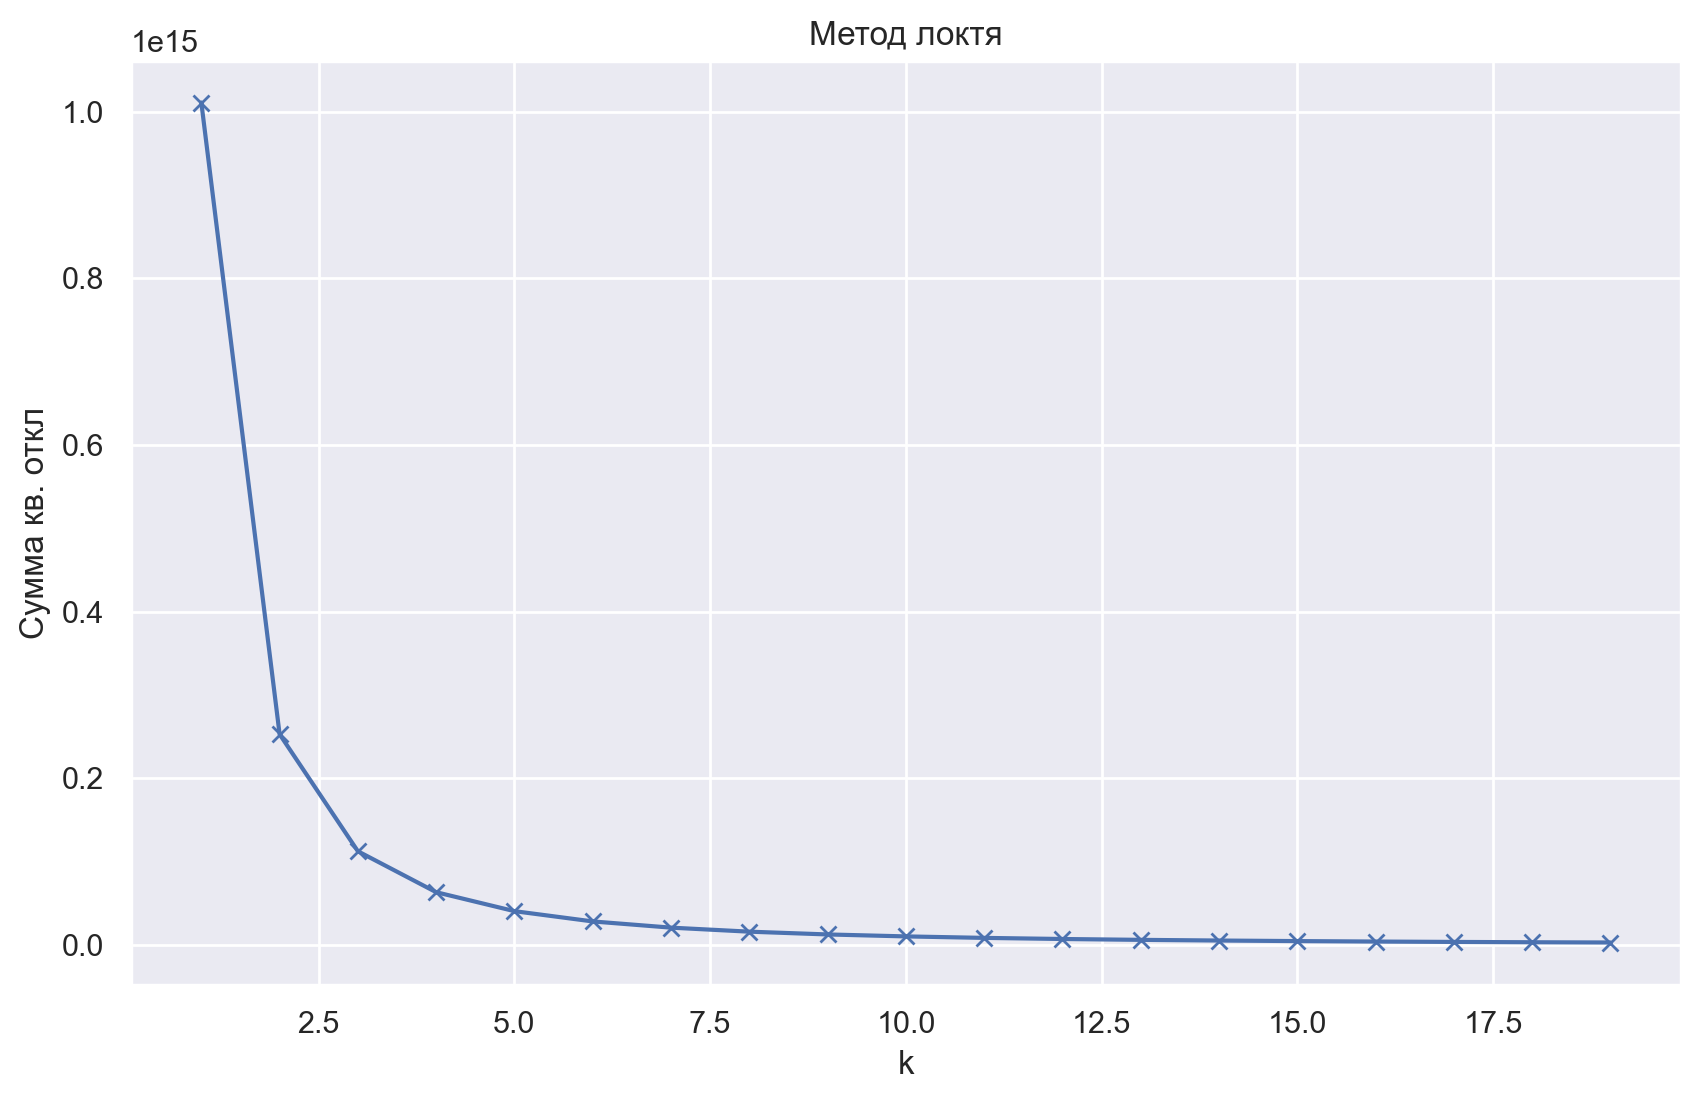

In [70]:
#Шаг 6. Кластеризация по покупателем
#2.Найти оптимальное количество кластеров по покупателям
Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df6[["customer_id"]])
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

На основании методя локтя произведем модель кластеризации по 4 кластерам

## 6.3.Построить модель кластеризации данных

In [71]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df6[['count', 'сумма', 'club_member', 'fashion_news', 'age']])
predict = kmeans.predict(df6[['count', 'сумма', 'club_member', 'fashion_news', 'age']])
df6['Кластер'] = predict
df6.head()

,customer_id,count,age,сумма,club_member,fashion_news,Кластер
0,91991,1,49.0,11.51,2,0,3
1,164401,1,32.0,13.71,2,2,0
2,182738,2,56.0,60.13,2,2,2
3,166422,1,30.0,25.41,2,2,0
4,164557,1,40.0,13.54,1,2,0


 ## 6.4.Визуализировать кластеры с помощью диаграммы рассеивания, выбрать подходящие признаки для диаграммы

In [72]:
# Определение наиболее важных признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df6[['customer_id','count','age','сумма','club_member','fashion_news']]
y = df6.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))  

          Specs         Score
0   customer_id  3.494438e+08
3         сумма  5.500774e+06
2           age  7.009802e+05
1         count  4.985866e+04
5  fashion_news  6.327839e+02
4   club_member  4.669834e+00


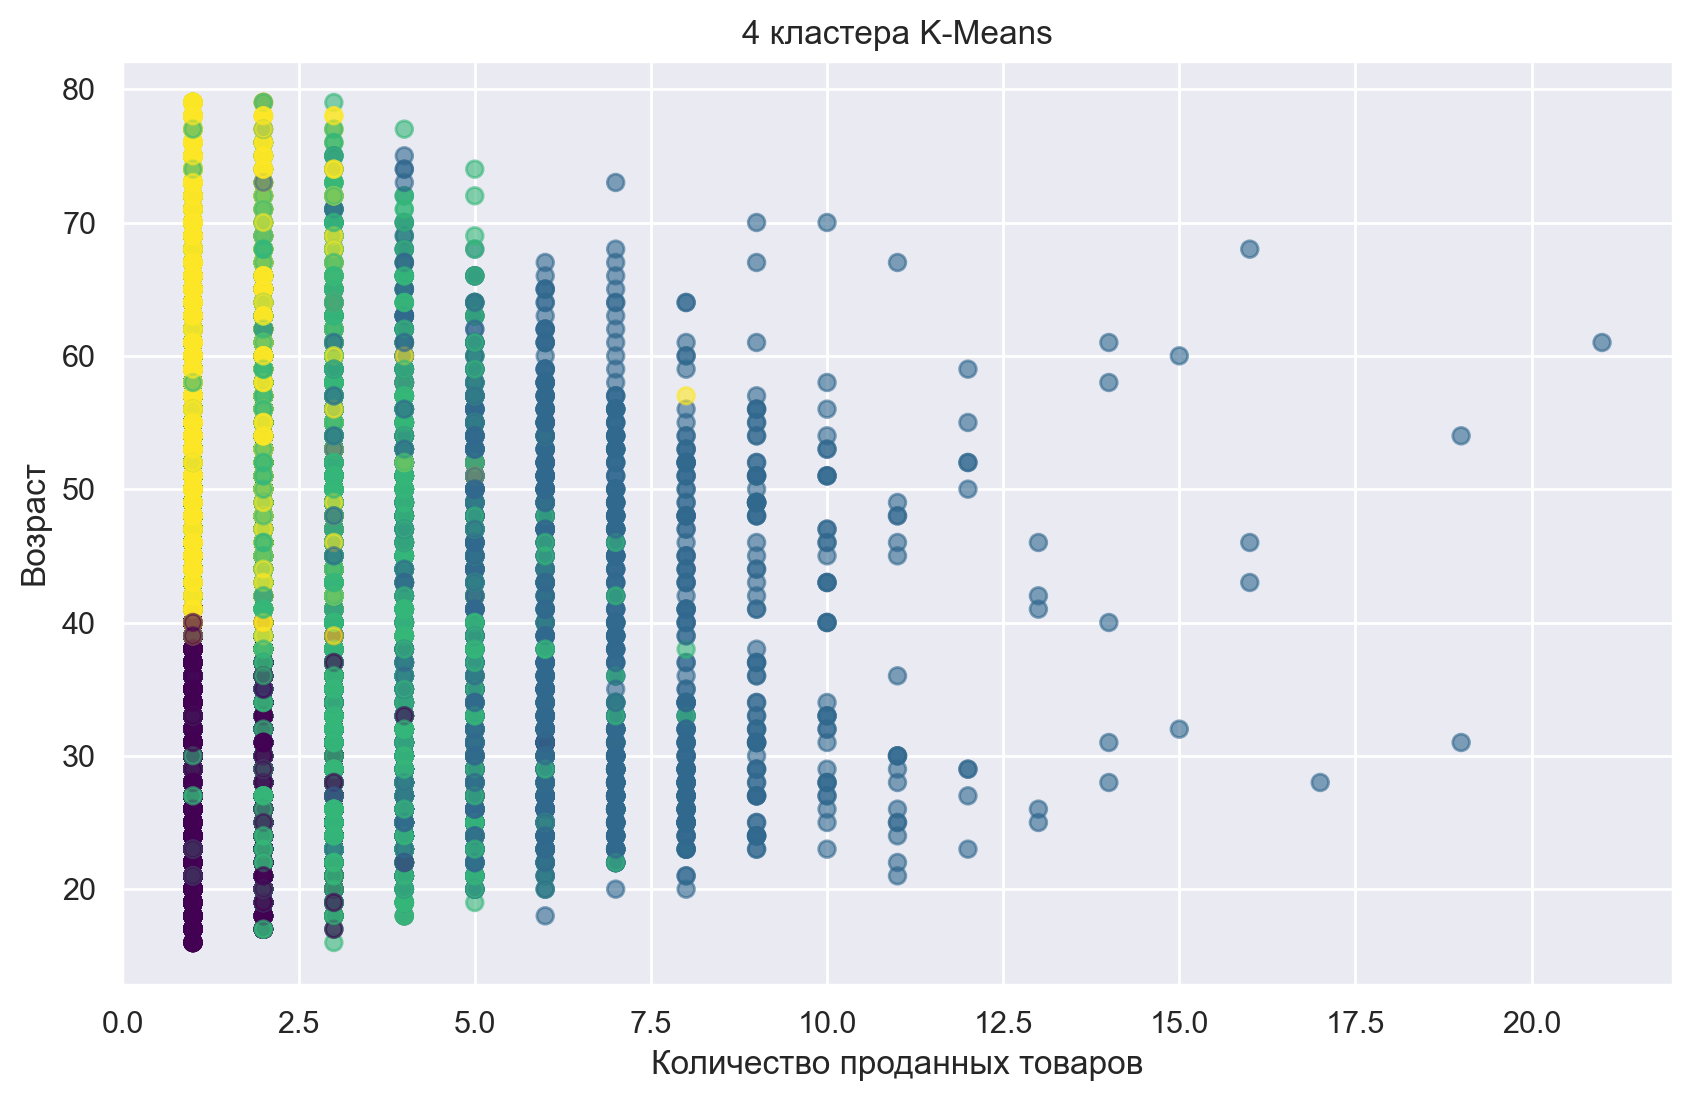

In [73]:
plt.scatter(df6['count'], df6['age'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('Количество проданных товаров')
plt.ylabel('Возраст')
plt.show()

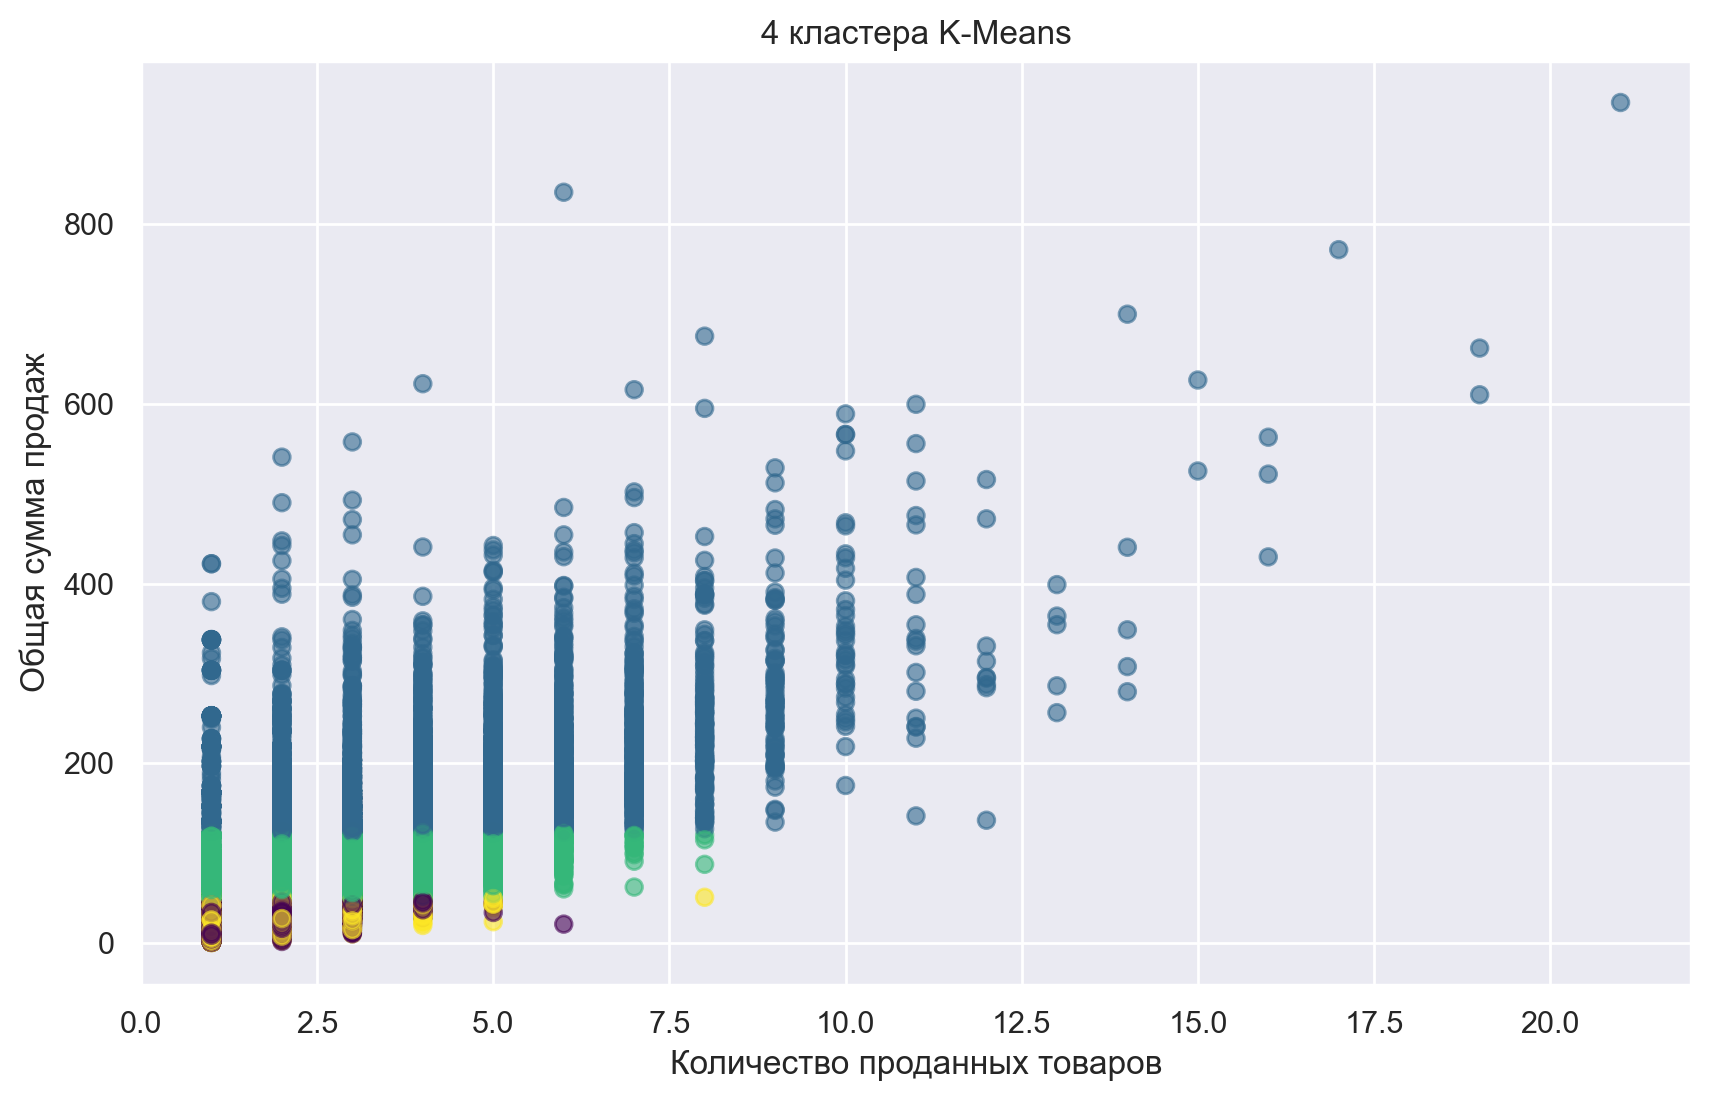

In [74]:
plt.scatter(df6['count'], df6['сумма'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('Количество проданных товаров')
plt.ylabel('Общая сумма продаж')
plt.show()

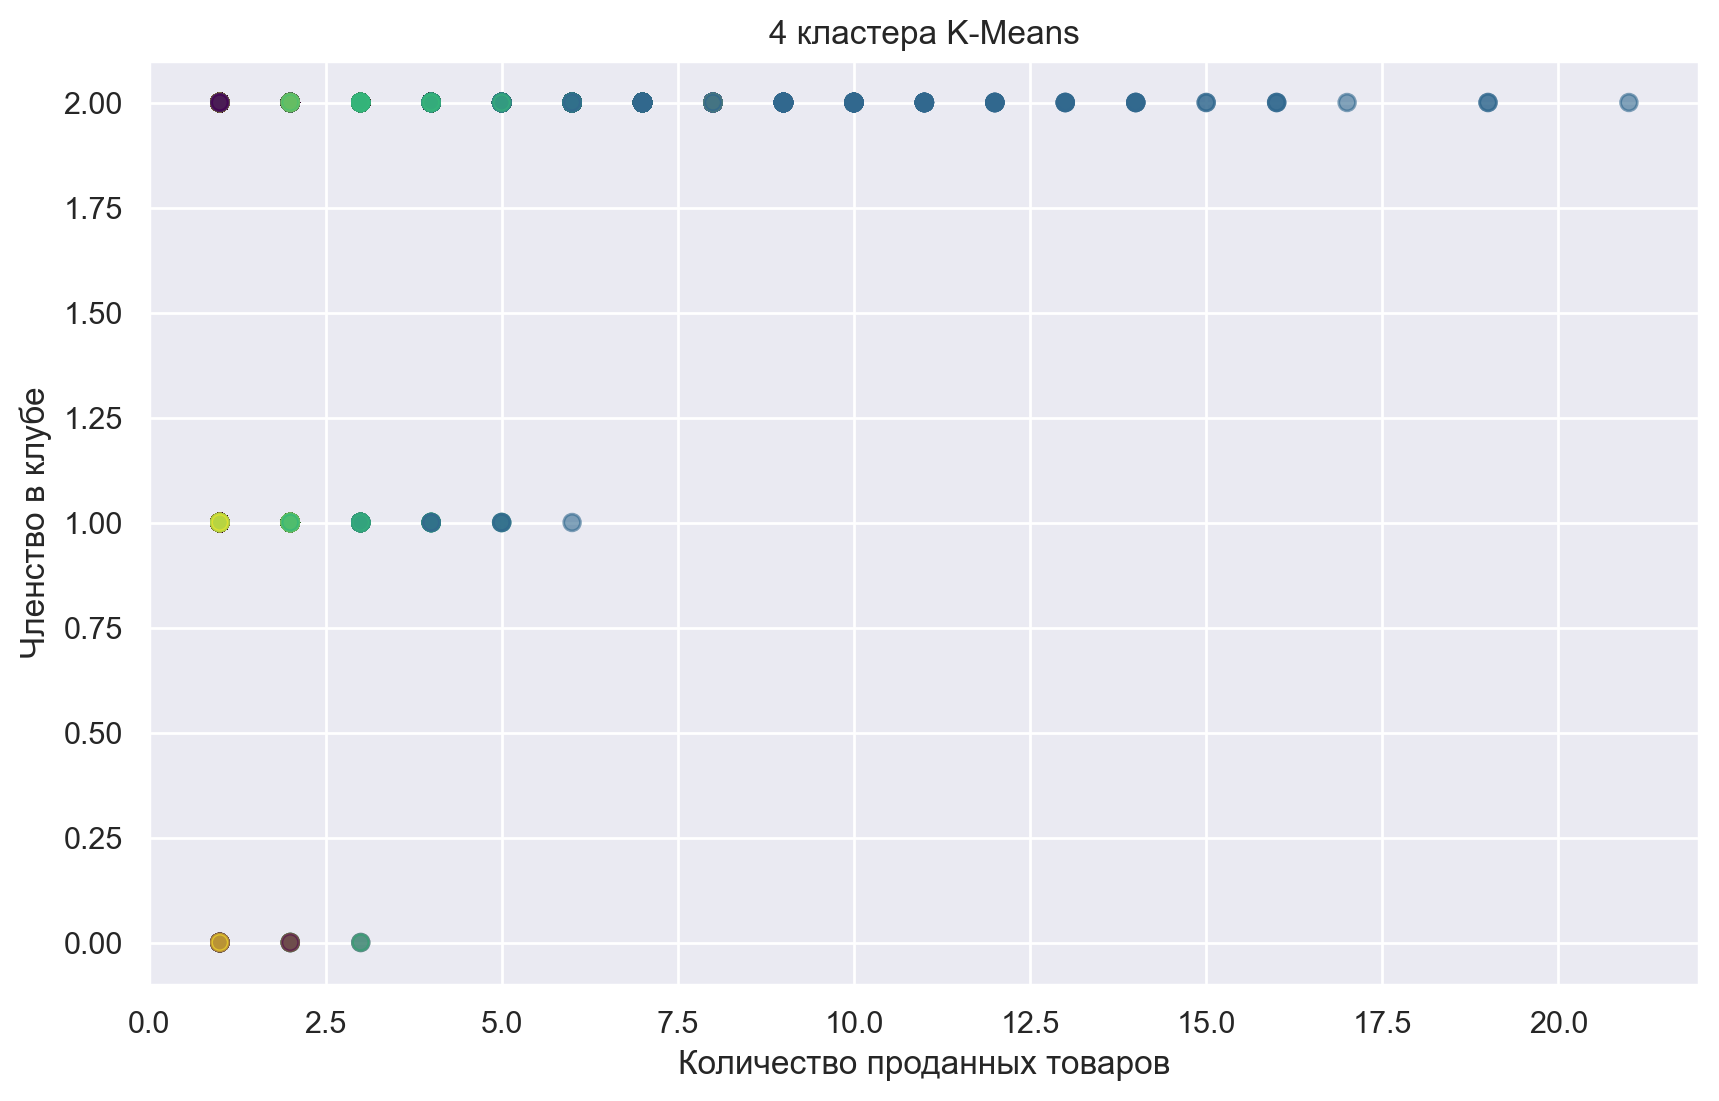

In [75]:
plt.scatter(df6['count'], df6['club_member'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('Количество проданных товаров')
plt.ylabel('Членство в клубе')
plt.show()

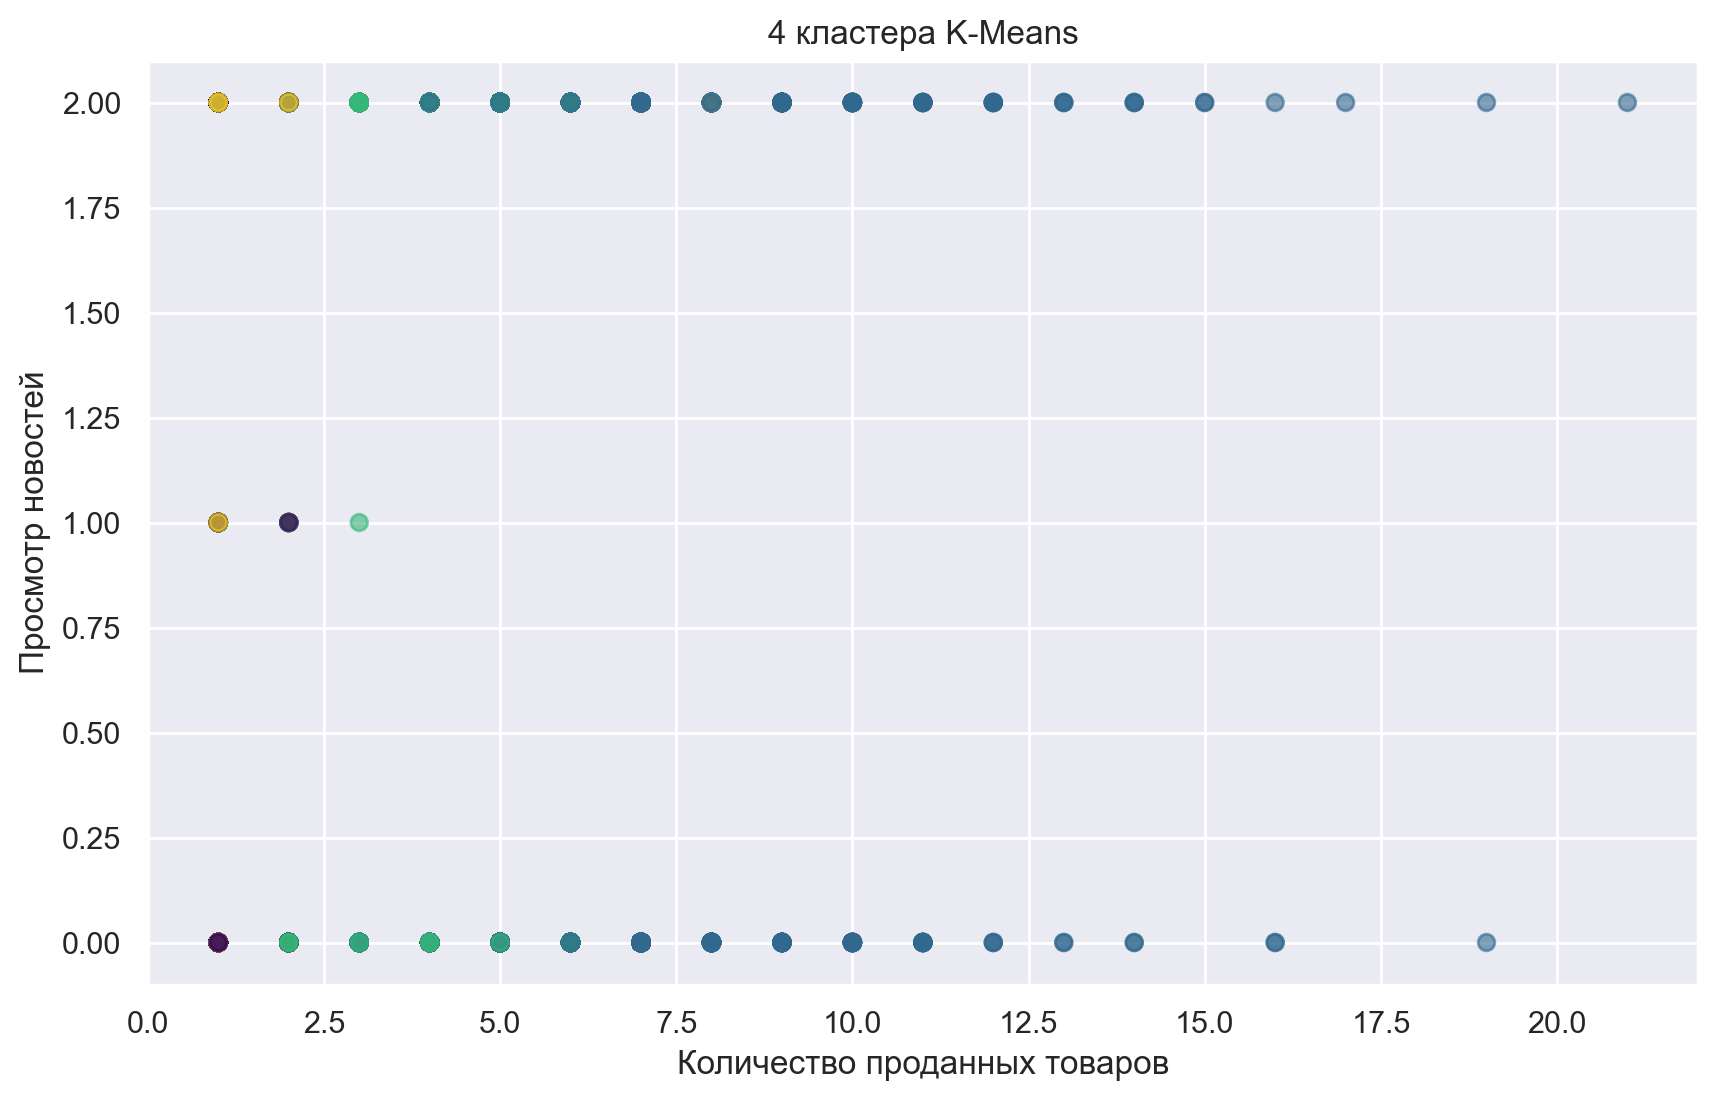

In [76]:
plt.scatter(df6['count'], df6['fashion_news'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('Количество проданных товаров')
plt.ylabel('Просмотр новостей')
plt.show()

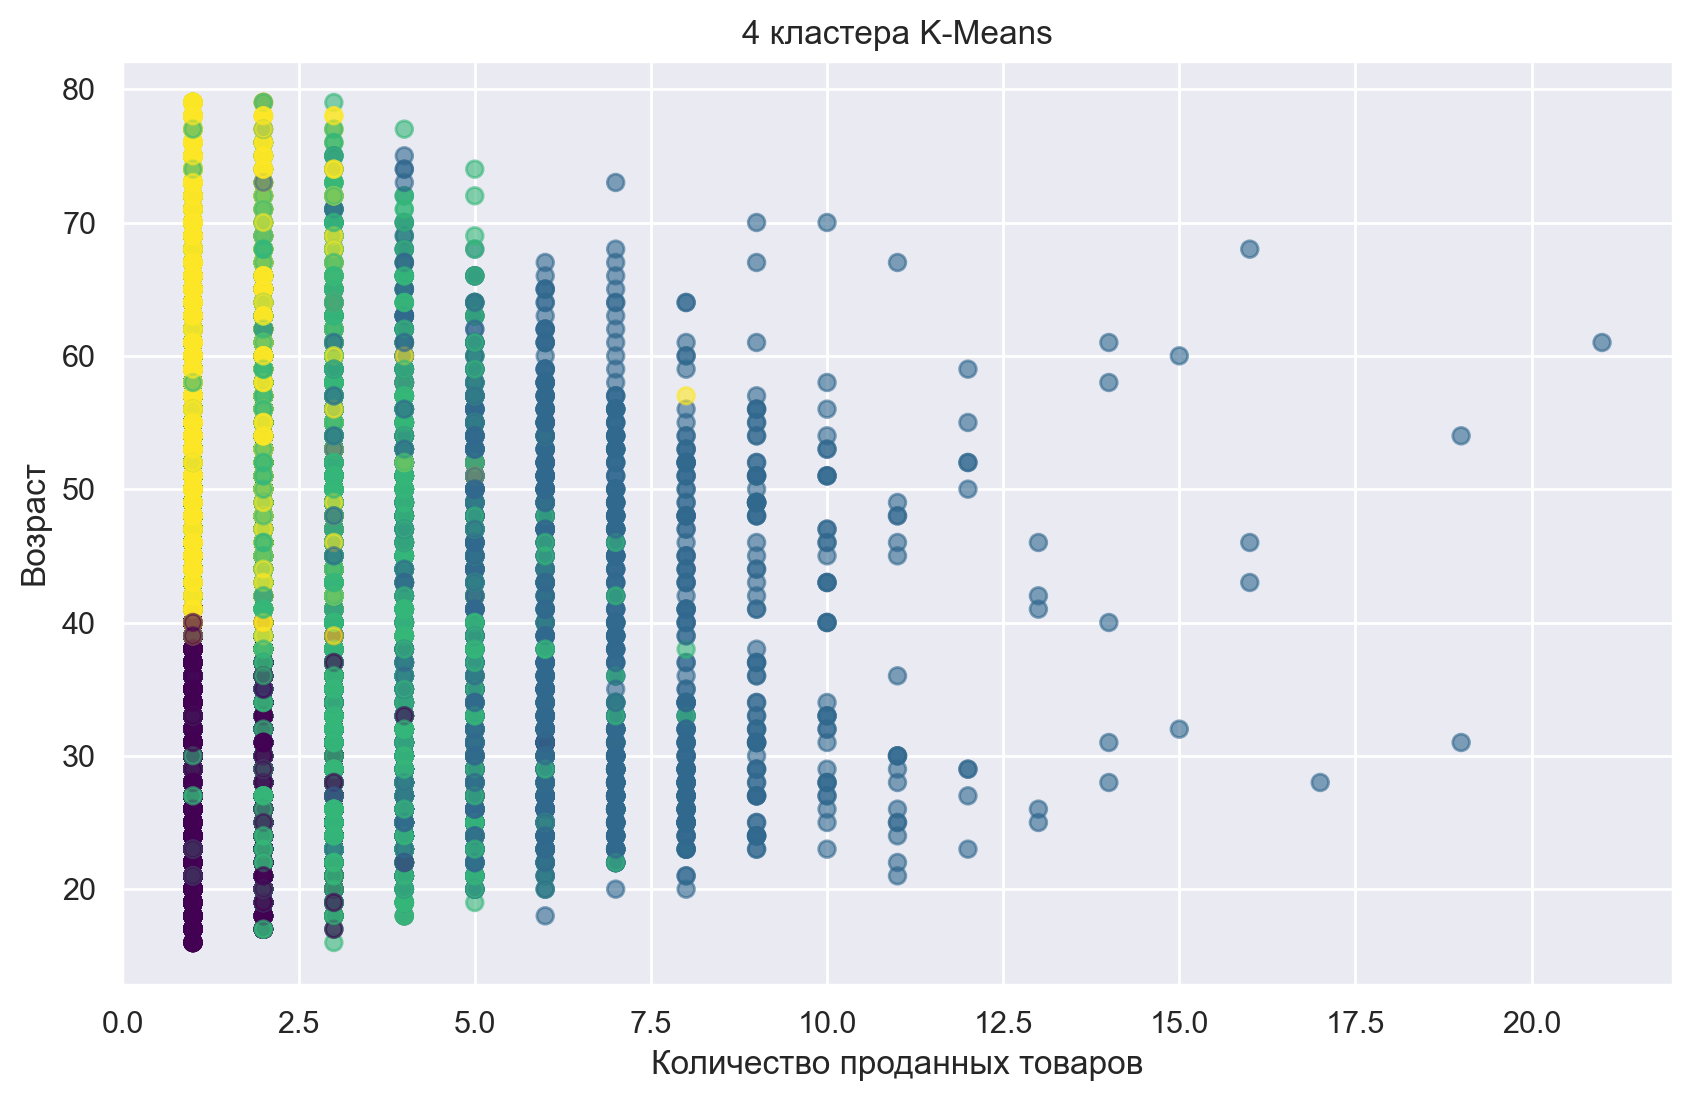

In [77]:
plt.scatter(df6['count'], df6['age'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('Количество проданных товаров')
plt.ylabel('Возраст')
plt.show()

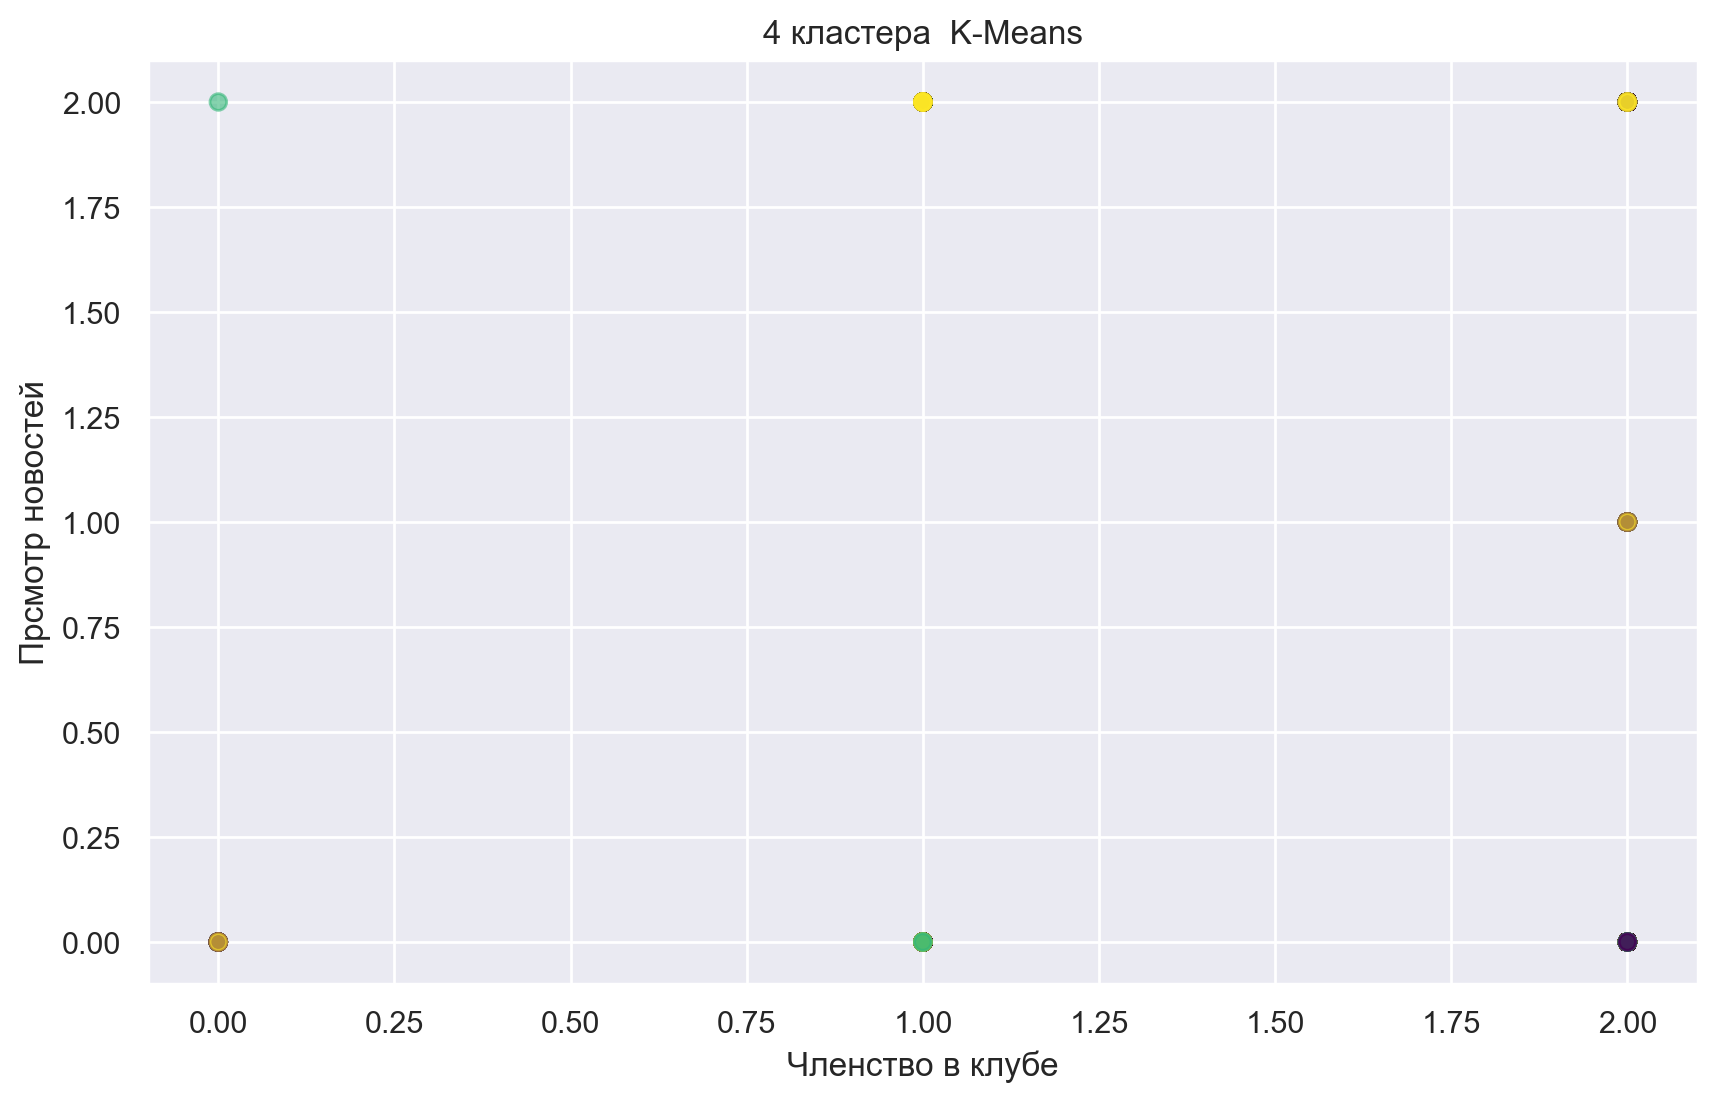

In [78]:
plt.scatter(df6['club_member'], df6['fashion_news'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера  K-Means')
plt.xlabel('Членство в клубе')
plt.ylabel('Прсмотр новостей')
plt.show()

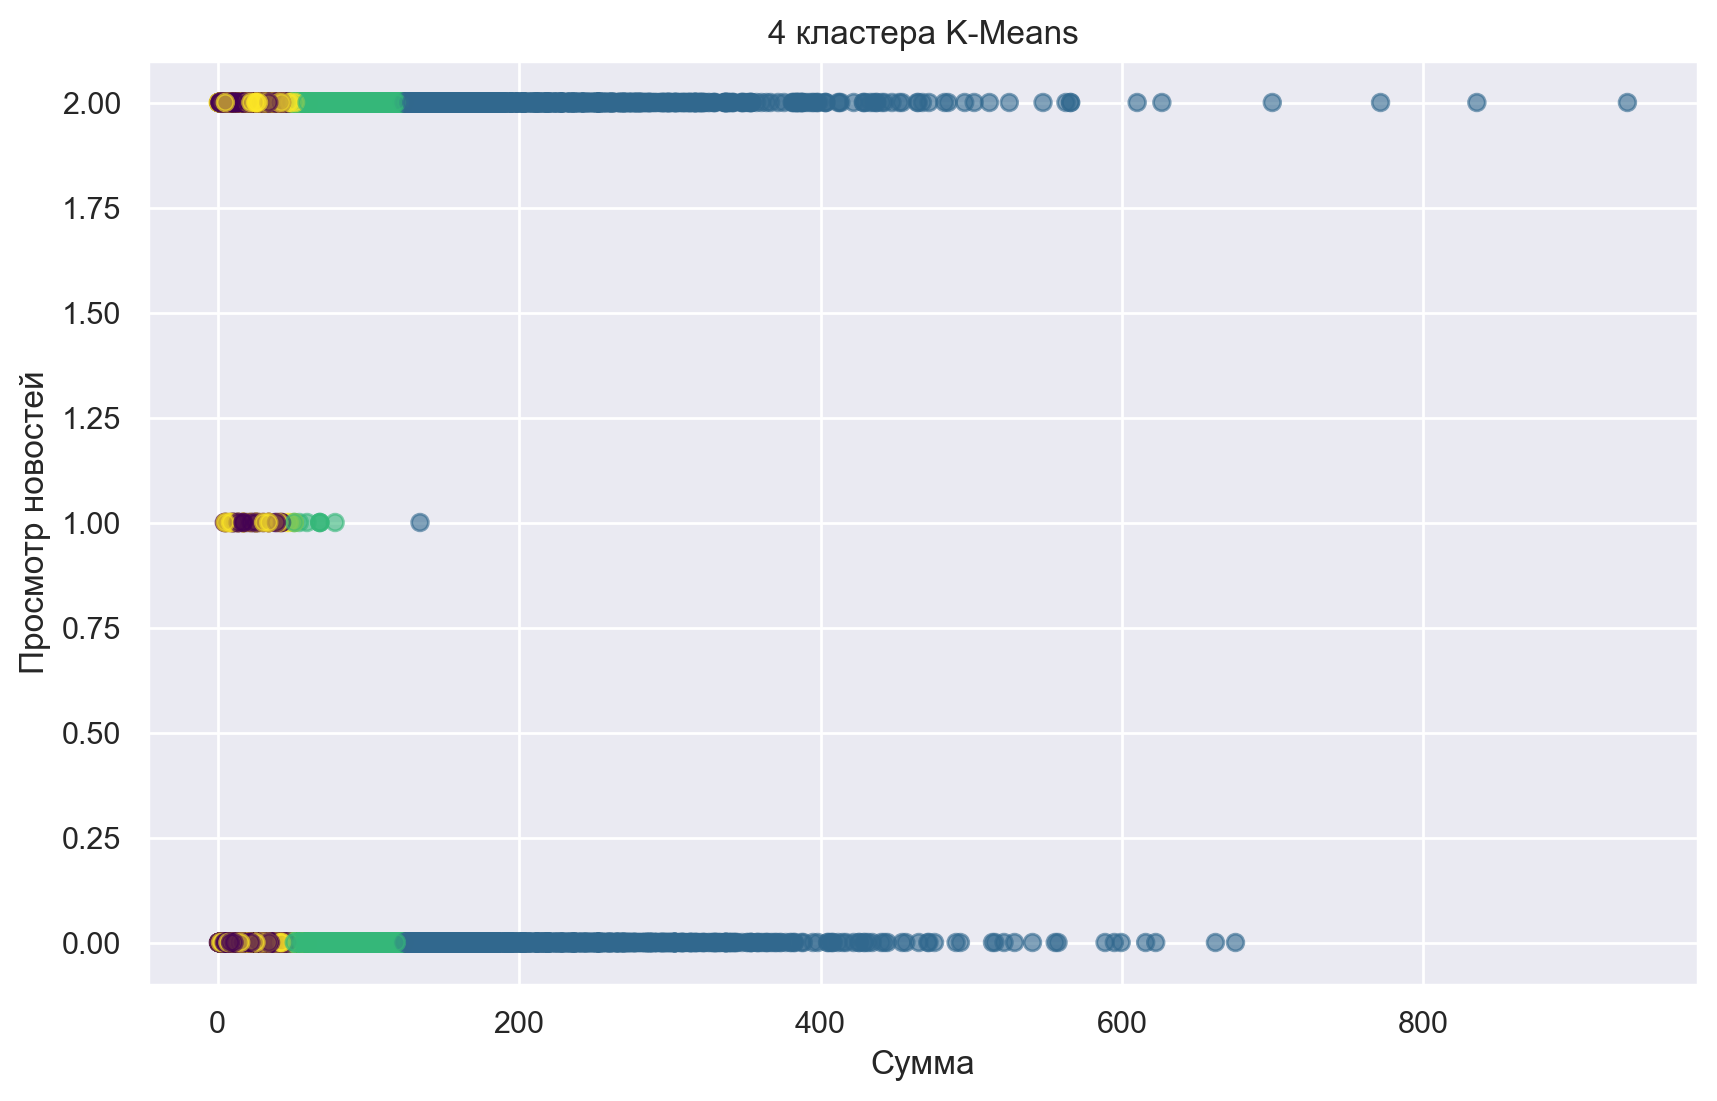

In [79]:
plt.scatter(df6['сумма'], df6['fashion_news'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('Сумма')
plt.ylabel('Просмотр новостей')
plt.show()

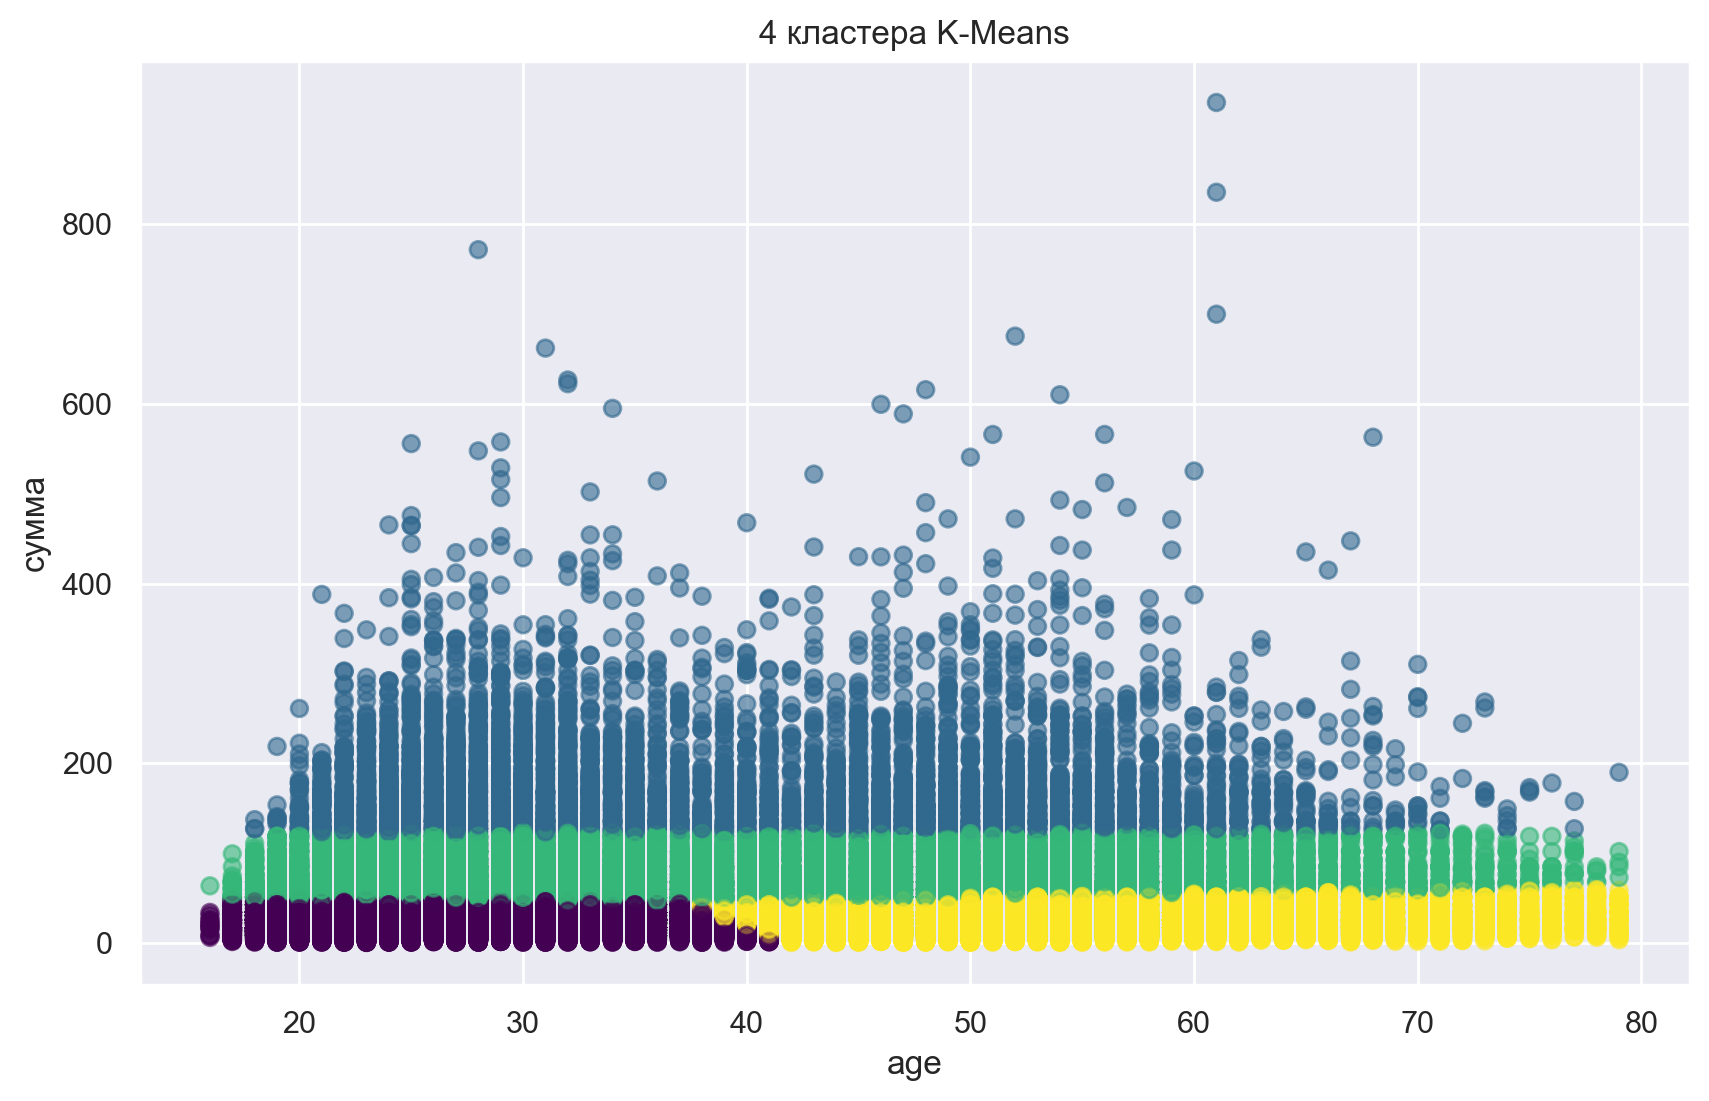

In [80]:
plt.scatter(df6['age'], df6['сумма'], c = kmeans.labels_, cmap='viridis', alpha = 0.6)
plt.title('4 кластера K-Means')
plt.xlabel('age')
plt.ylabel('сумма')
plt.show()

# Шаг 7.Построение рекомендательной системы

##  7.1.Сформировать датасет с признаками покупатель, товар, количество купленных товаров

In [81]:
#Шаг 7.Построение рекомендательной системы
#1.Сформировать датасет с признаками покупатель, товар, количество купленных товаров
qty = df_rating.groupby(['customer_id', 'article_id']).article_id.count().reset_index(name = 'articles_qty')
qty.merge(df_item, how = 'left', on = 'article_id')

,customer_id,article_id,articles_qty,product_name,color
0,0,706016003,1,Trousers,Dark Blue
1,0,812376001,1,Underwear Tights,Black
2,1,493810014,1,Trousers,Black
3,2,594541012,1,Trousers,Beige
4,3,719712001,1,Shirt,Light Blue
...,...,...,...,...,...
317136,229799,636323001,1,Trousers,Black
317137,229800,657795001,1,Sweater,Red
317138,229801,636323001,1,Trousers,Black
317139,229802,589924010,1,Top,Dark Blue


In [82]:
df7=qty.merge(df_item, how = 'left', on = 'article_id')
df7.head()

,customer_id,article_id,articles_qty,product_name,color
0,0,706016003,1,Trousers,Dark Blue
1,0,812376001,1,Underwear Tights,Black
2,1,493810014,1,Trousers,Black
3,2,594541012,1,Trousers,Beige
4,3,719712001,1,Shirt,Light Blue


In [83]:
total_product_name=[]
for g in df7.product_name:
    g=g.split('|')
    if g not in total_product_name:
        total_product_name.append(g)
total_product_name   
    

[['Trousers'],
 ['Underwear Tights'],
 ['Shirt'],
 ['Bra'],
 ['Jumpsuit/Playsuit'],
 ['Cardigan'],
 ['Sweater'],
 ['Top'],
 ['Vest top'],
 ['Socks'],
 ['Leggings/Tights'],
 ['Dress'],
 ['Bikini top'],
 ['Blouse'],
 ['Underwear bottom'],
 ['T-shirt'],
 ['Shorts'],
 ['Skirt'],
 ['Hoodie'],
 ['Jacket'],
 ['Bodysuit'],
 ['Pyjama set'],
 ['Underdress'],
 ['Blazer'],
 ['Swimwear bottom'],
 ['Sarong'],
 ['Coat'],
 ['Necklace'],
 ['Swimsuit'],
 ['Belt'],
 ['Boots'],
 ['Scarf'],
 ['Sneakers'],
 ['Hair string'],
 ['Hair ties'],
 ['Hat/beanie'],
 ['Hair clip'],
 ['Bag'],
 ['Underwear body'],
 ['Polo shirt'],
 ['Flip flop'],
 ['Earring'],
 ['Sandals'],
 ['Hat/brim'],
 ['Slippers'],
 ['Pyjama bottom'],
 ['Ring'],
 ['Wedge'],
 ['Robe'],
 ['Cap/peaked'],
 ['Hair/alice band'],
 ['Sunglasses'],
 ['Heeled sandals'],
 ['Pumps'],
 ['Garment Set'],
 ['Ballerinas'],
 ['Gloves'],
 ['Other accessories'],
 ['Unknown'],
 ['Night gown'],
 ['Outdoor Waistcoat'],
 ['Flat shoe'],
 ['Swimwear set'],
 ['Other shoe'],

In [84]:
df7= df7[['customer_id','article_id','articles_qty']]
df7.head()

,customer_id,article_id,articles_qty
0,0,706016003,1
1,0,812376001,1
2,1,493810014,1
3,2,594541012,1
4,3,719712001,1


In [85]:
df7.columns = ['user','item','rating']
df7.tail()

,user,item,rating
317136,229799,636323001,1
317137,229800,657795001,1
317138,229801,636323001,1
317139,229802,589924010,1
317140,229803,720506003,1


In [86]:
df7.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 317141 entries, 0 to 317140
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    317141 non-null  int64
 1   item    317141 non-null  int64
 2   rating  317141 non-null  int64
dtypes: int64(3)
memory usage: 9.7 MB


In [87]:
df7.describe()

,user,item,rating
count,317141.000000,3.171410e+05,317141.000000
mean,103057.021101,6.958375e+08,1.002343
std,65784.902352,1.337117e+08,0.049442
min,0.000000,1.087750e+08,1.000000
25%,45396.000000,6.315900e+08,1.000000
50%,97346.000000,7.140260e+08,1.000000
75%,157723.000000,7.865790e+08,1.000000
max,229803.000000,9.534500e+08,5.000000


In [88]:
df7.isnull().sum()

user      0
item      0
rating    0
dtype: int64

Попытки анализировать датасет приводдят к переполнению памяти. Производим сокращение файла до 15 000 строк. С помощью команд head и tail убеждаемя , что пользователь с id=6510 входит в диапазон сокращенного датасета

In [89]:
df=df7.iloc[:15000,:]

In [90]:
df.head()

,user,item,rating
0,0,706016003,1
1,0,812376001,1
2,1,493810014,1
3,2,594541012,1
4,3,719712001,1


In [91]:
df.tail()

,user,item,rating
14995,8024,863001002,1
14996,8025,750062001,1
14997,8026,689038002,1
14998,8027,706016006,1
14999,8028,680263003,1


## 7.2 Выполнить коллаборативную фильтрацию по схожести покупателей

In [92]:
#построение матрицы
from scipy.sparse import csr_matrix 
df_matrix = df.pivot(index='user', columns='item', values='rating').fillna(0)
w1_pivot_matrix = csr_matrix(df_matrix)

Использование методики kNN sklearn.neighbors

In [93]:
from sklearn.neighbors import NearestNeighbors  
from collections import defaultdict
from scipy.sparse import csr_matrix 

In [94]:
df_matrix = df.pivot(index= 'user',columns='item',values='rating').fillna(0)
w1_pivot_matrix = csr_matrix(df_matrix)

In [95]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(w1_pivot_matrix)

In [96]:
def most_similar_users_to(user_id):
    most_similar_users_to = []
    distance, indice = model_knn.kneighbors(df_matrix.iloc[user_id,:].values.reshape(1,-1), n_neighbors=10)
    for i in range(1, len(distance.flatten())):
        user_id1 = df_matrix.index[indice.flatten()[i]]
        most_similar_users_to.append((user_id1, distance.flatten()[i]))

    most_similar_users_to.sort(key=lambda x: x[1], reverse=True)

    return most_similar_users_to[:10] 

In [97]:
def user_based_suggestions(user_id):
    # суммировать все коэффициенты подобия
    suggestions = defaultdict(float)
    non_interacted_items = df_matrix.iloc[user_id][df_matrix.iloc[user_id]==0].index.tolist()
    for other_user_id, similarity in most_similar_users_to(user_id):
        items_user_id = df_matrix.loc[other_user_id][df_matrix.loc[other_user_id]>0]
        for interest in items_user_id.index.tolist():
            if interest in non_interacted_items:
                 # для вывода списка товаров/фильмов,  df_items - датафрейм с названиями товаров/фильмов
                item_name = df_item[df_item['article_id']==interest]['product_name'].values[0]
                suggestions[item_name] += similarity
    # преобразовать их в сортированный список
    suggestions = sorted(suggestions.items(),
                         key=lambda x: x[1],
                         reverse=True)
    return suggestions[:10] 

## 7.3  Вывести в качестве рекомендаций список наименований товаров для пользователя с ИД = 6510

In [98]:
print("Рекомендации для пользователя с ИД=6510")
print(user_based_suggestions(6510))

Рекомендации для пользователя с ИД=6510
[('Trousers', 5.0), ('Sweater', 3.0), ('Bag', 1.0), ('Dress', 1.0), ('Blazer', 1.0), ('Leggings/Tights', 1.0), ('Vest top', 1.0), ('Bra', 1.0), ('Jumpsuit/Playsuit', 1.0), ('Blouse', 1.0)]
